# 3. EXPLORATORY DATA ANALYSIS

---

<small> Note: The 'utils.py' file contains **specific functions** according to the standards of Exploratory Data Analysis (EDA) and Descriptive Data Analysis (DDA). The functions with the prefix 'eda' are described in the 'utils.py' doc <small>

### 3.0. Libraries and dataset

In [57]:
# LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils as eda

# DATASETS
total_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\Regularized-linear-regression\data\interim\eda_total_data.csv')
target = 'Obesity_number'


In order to simplify the analysis, some columns of the dataframe will be renamed

In [58]:
#df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'}, inplace=True)


total_data = total_data.rename(columns={'TOT_POP': 'total_pop',
                           "19-Oct": '10-19',
                           'White-alone pop': 'white_pop',
                           'Black-alone pop': 'black_pop',
                           'Native American/American Indian-alone pop': 'native_pop',
                           'Asian-alone pop': 'asian_pop',
                           'Hawaiian/Pacific Islander-alone pop': 'pacific_pop',
                           'Two or more races pop': 'other_pop',
                           'POVALL_2018': 'poverty_pop',
                           'MEDHHINC_2018': 'median_house_income',
                           'Med_HH_Income_Percent_of_State_Total_2018': 'median_county_hi',
                           'Active Physicians per 100000 Population 2018 (AAMC)': 'physicians_100k',
                           'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)': 'pa_physicians_100k',
                           'Total Hospitals (2019)': 'total_hospitals'
                           })


### 3.1. Numerical analysis

Note: since all the predictors used in this dataset are numerical, there is no need to factorize.

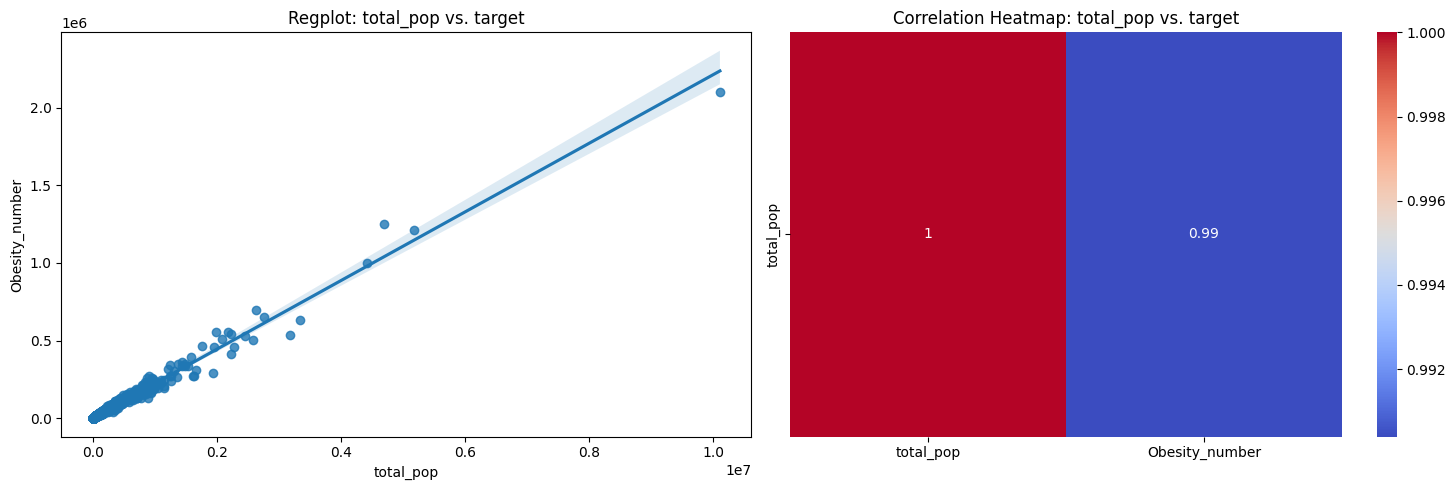

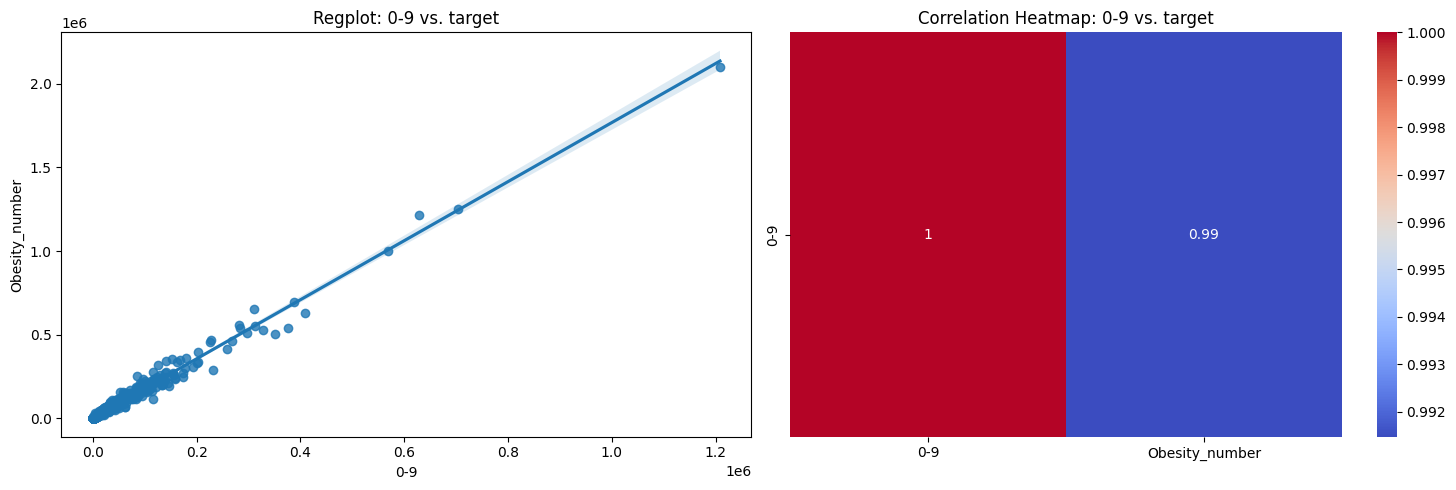

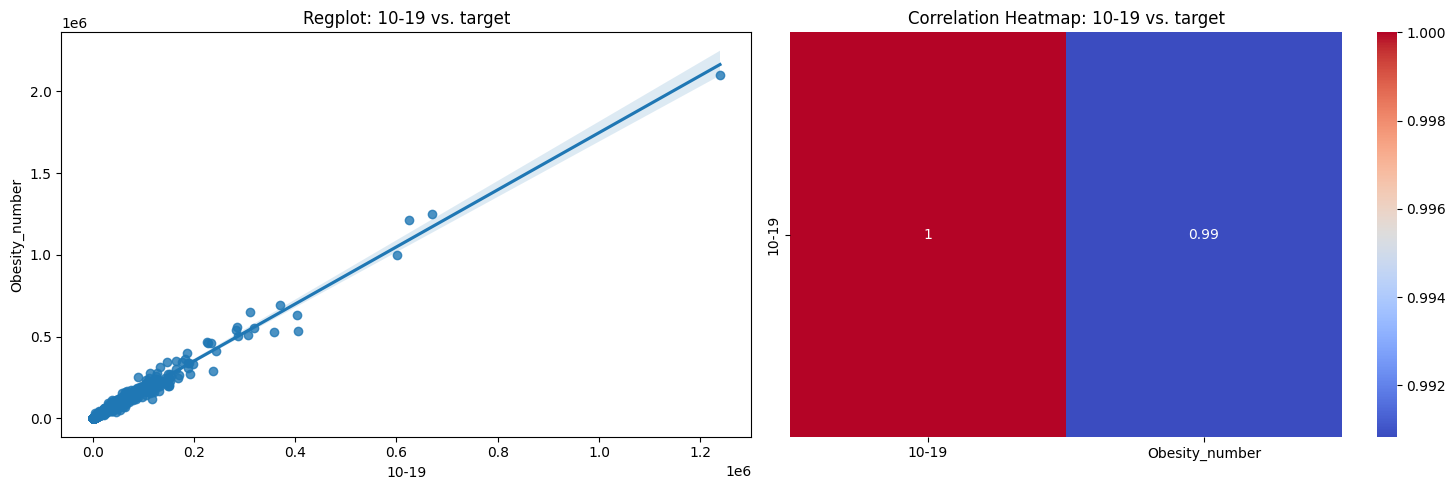

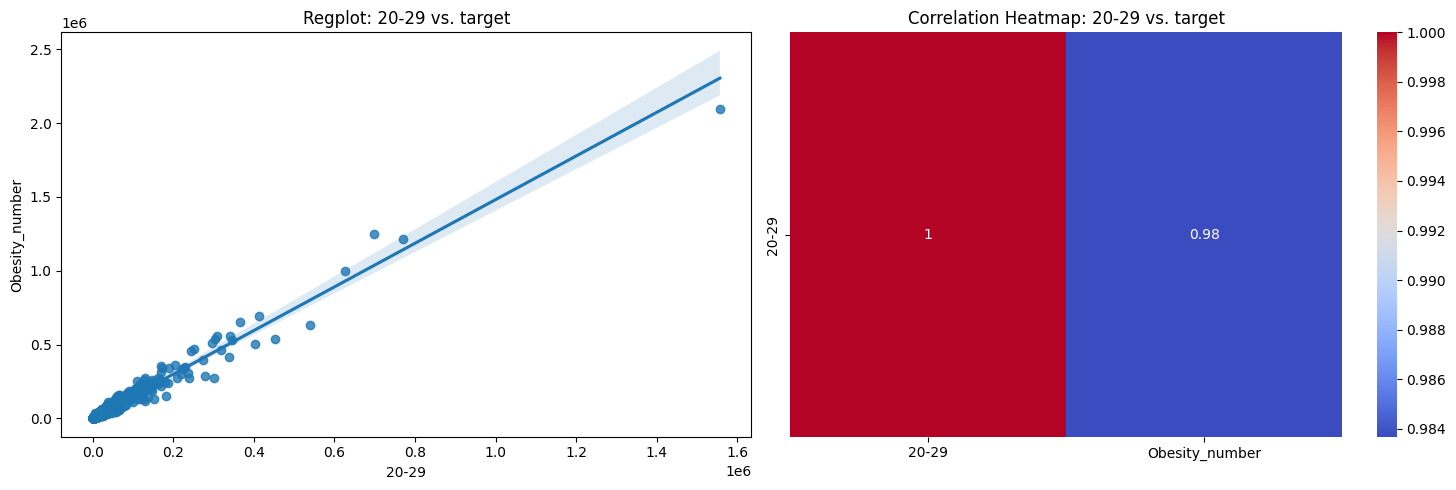

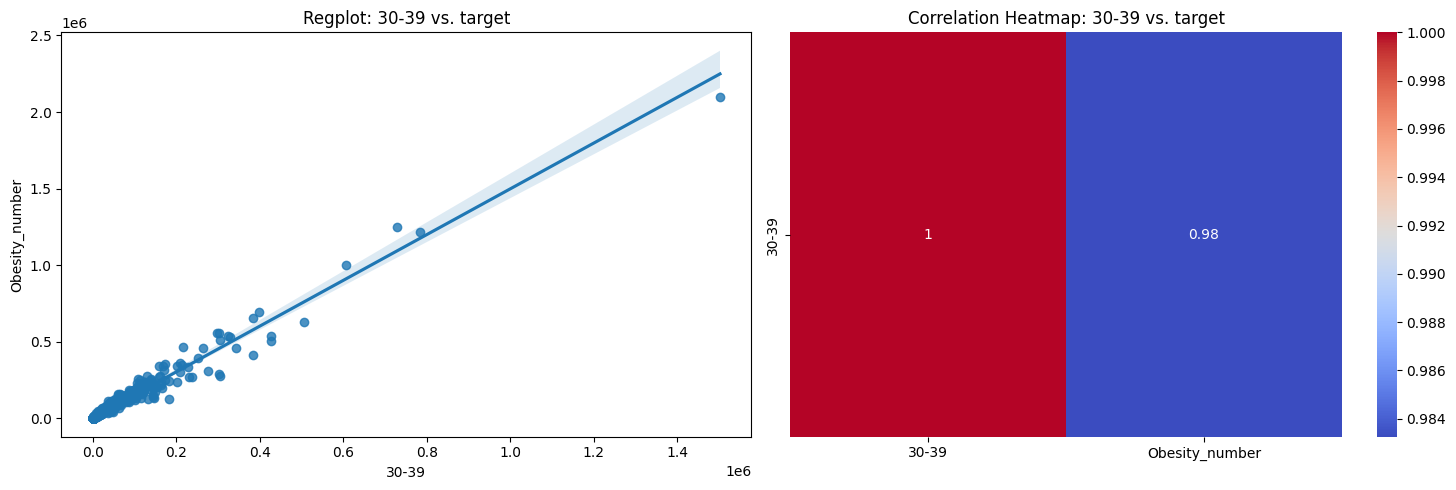

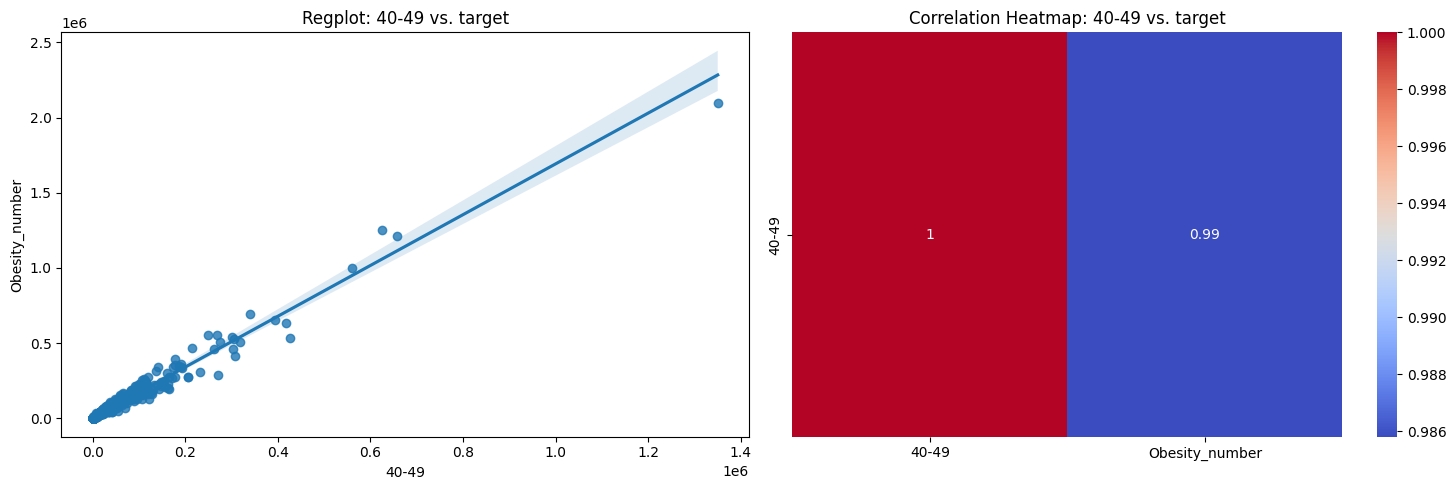

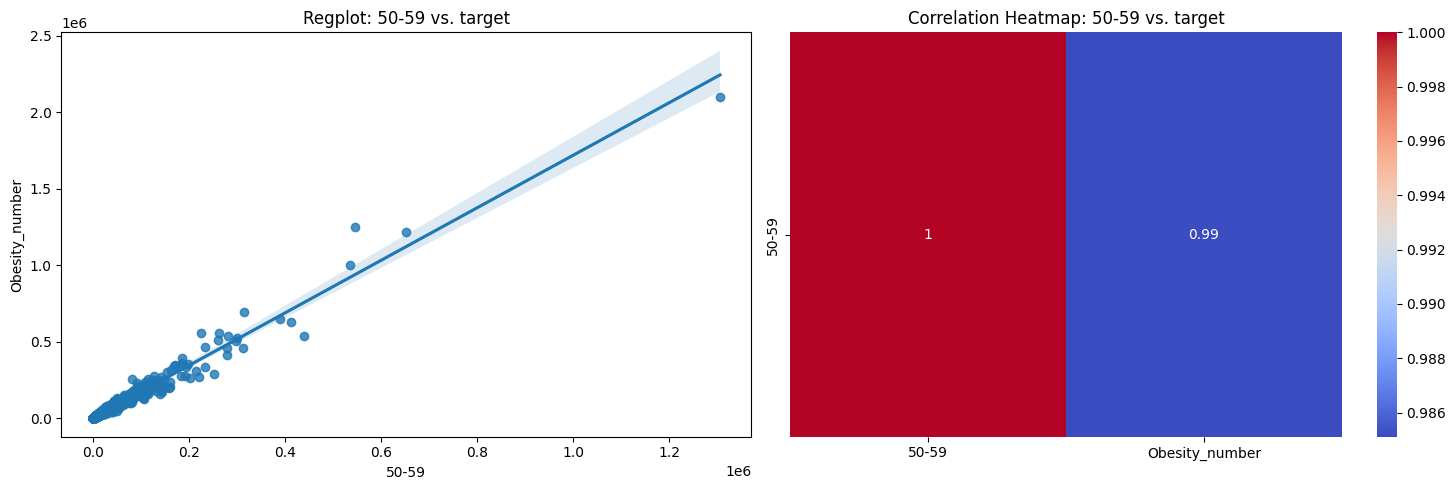

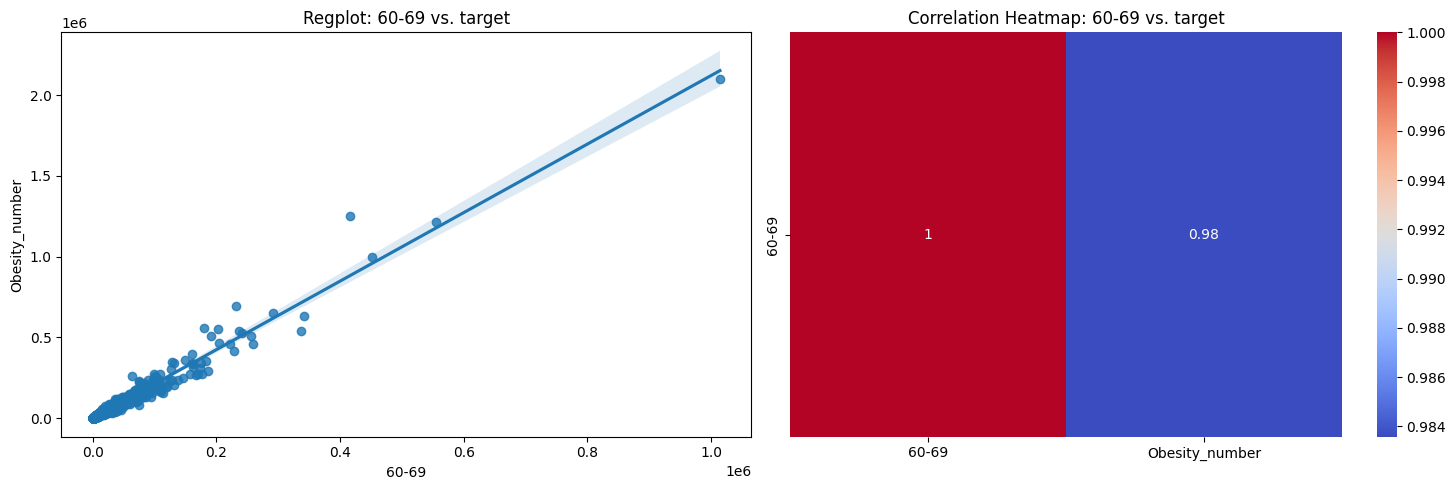

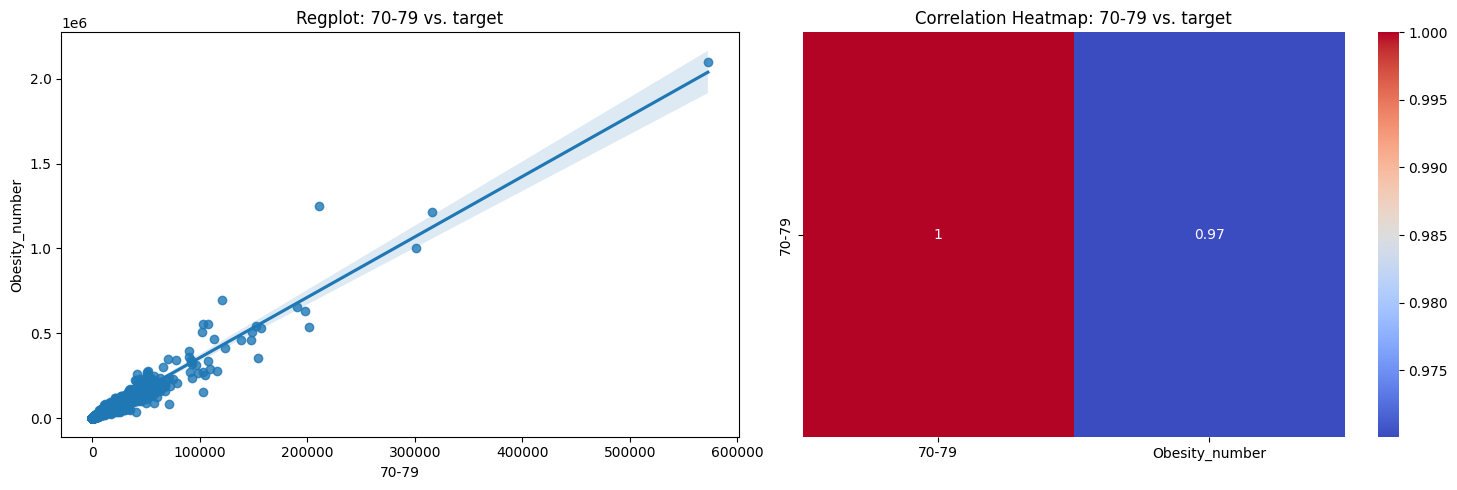

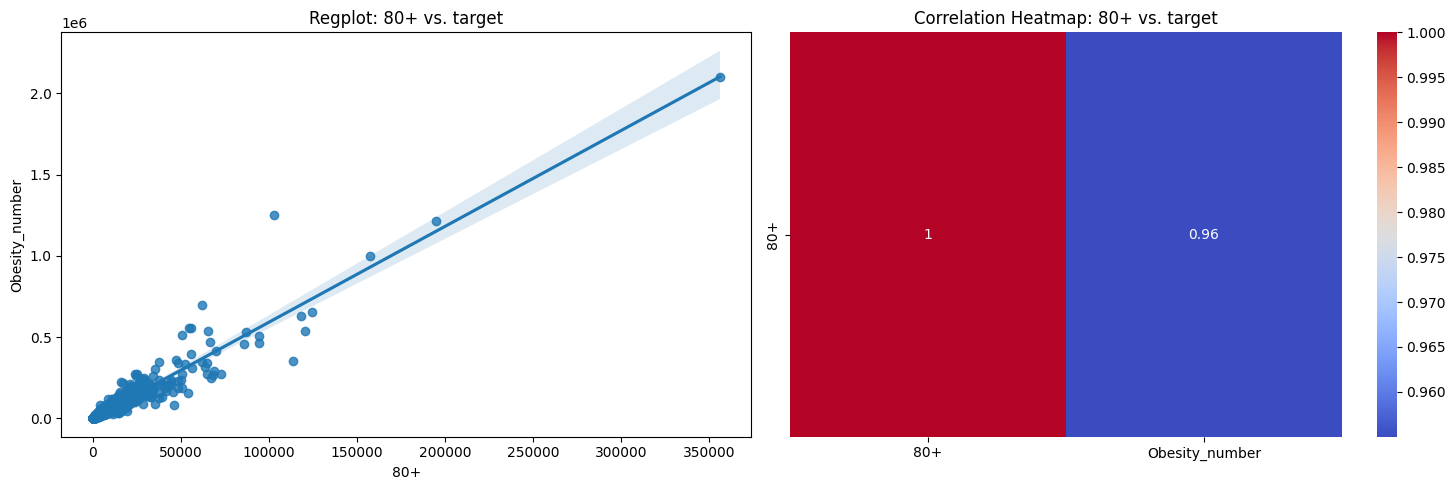

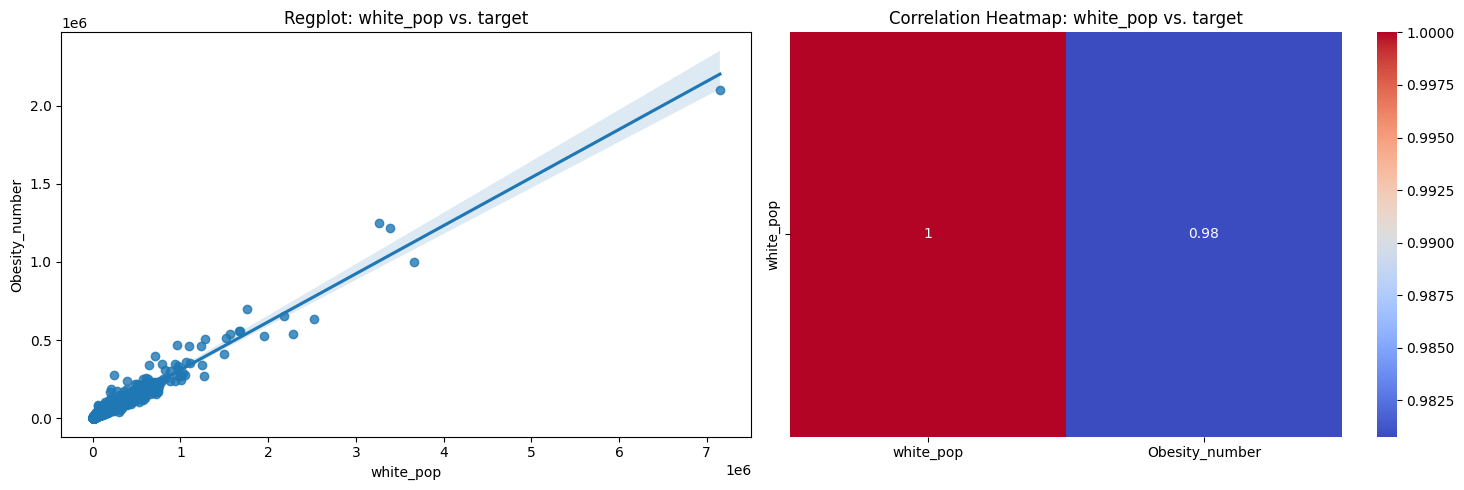

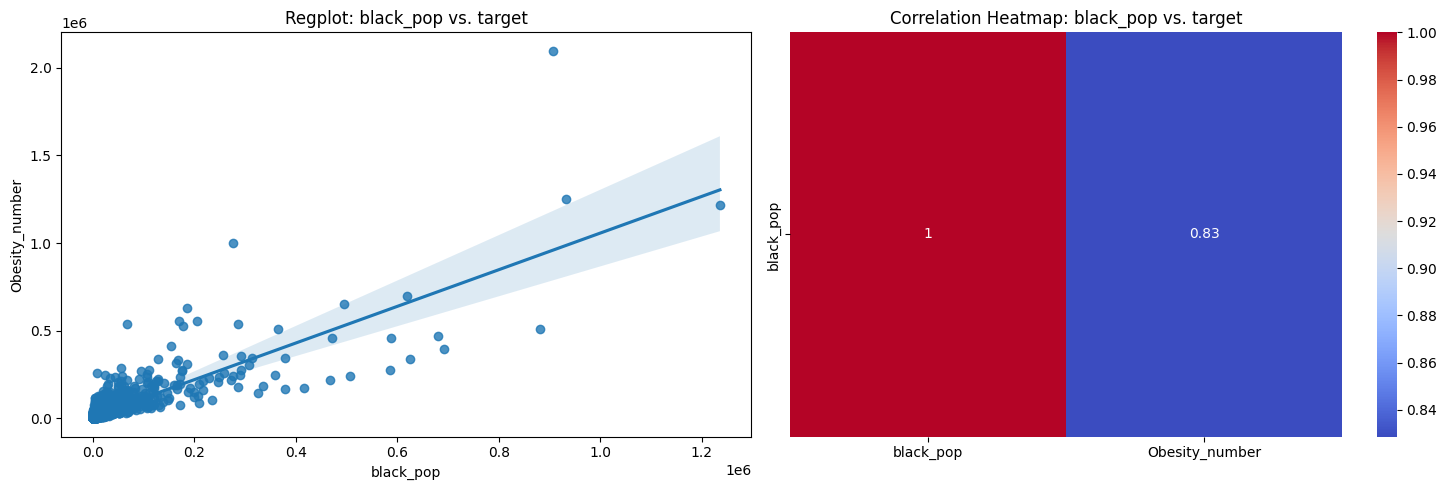

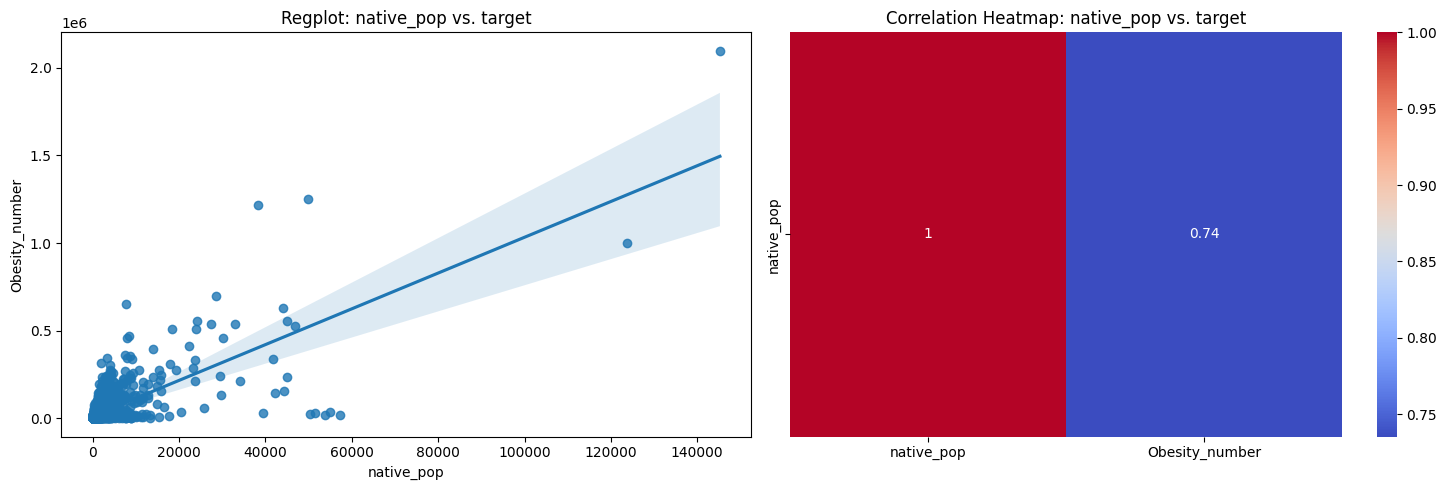

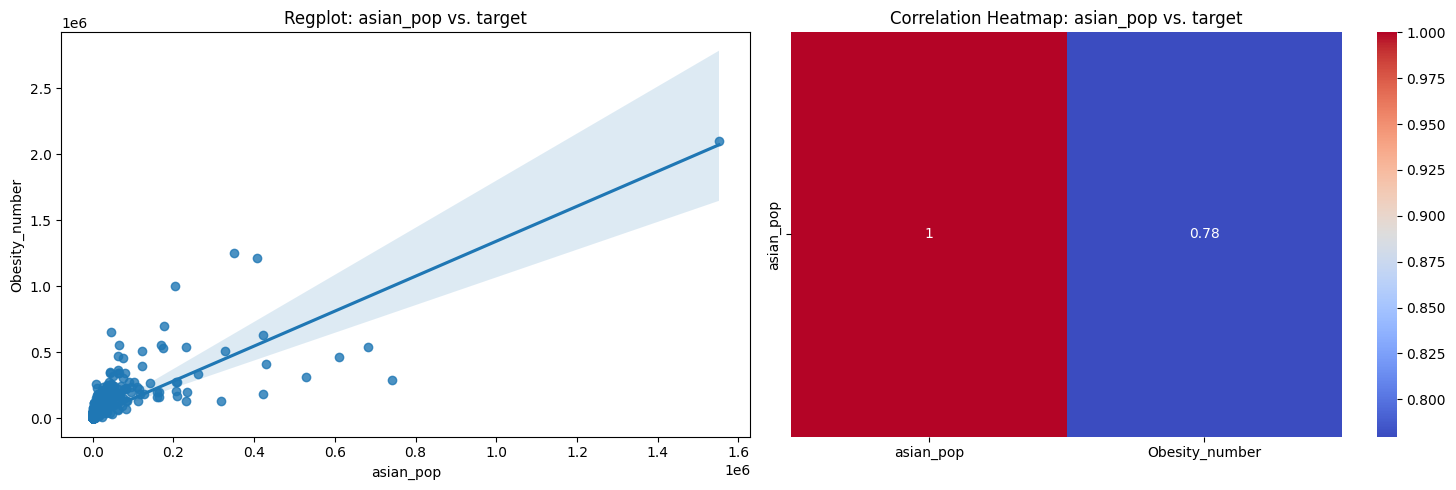

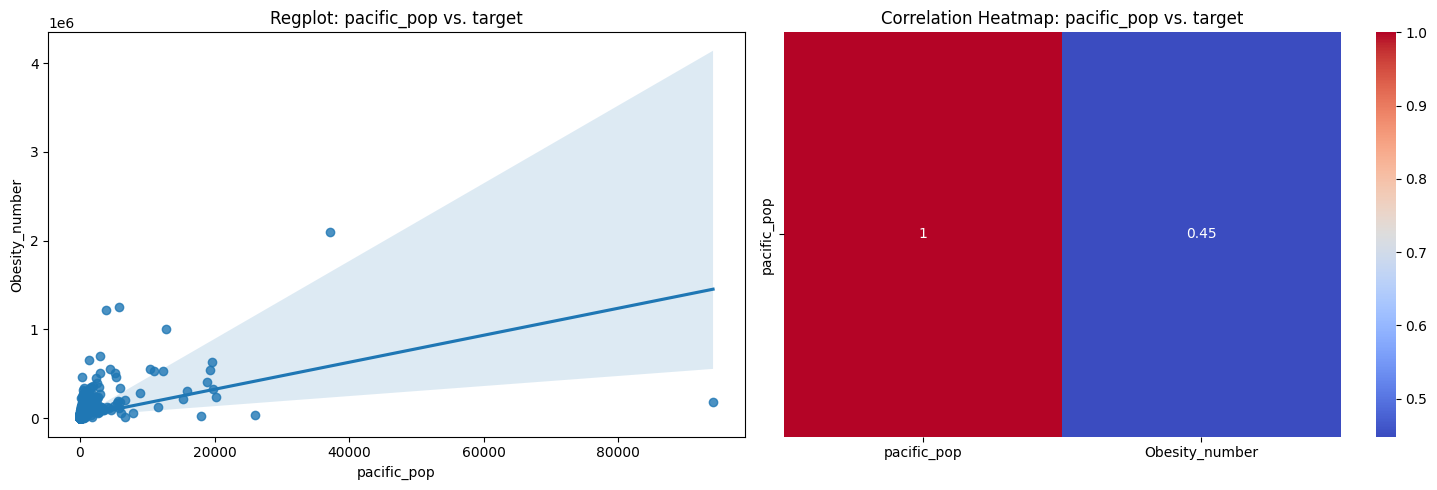

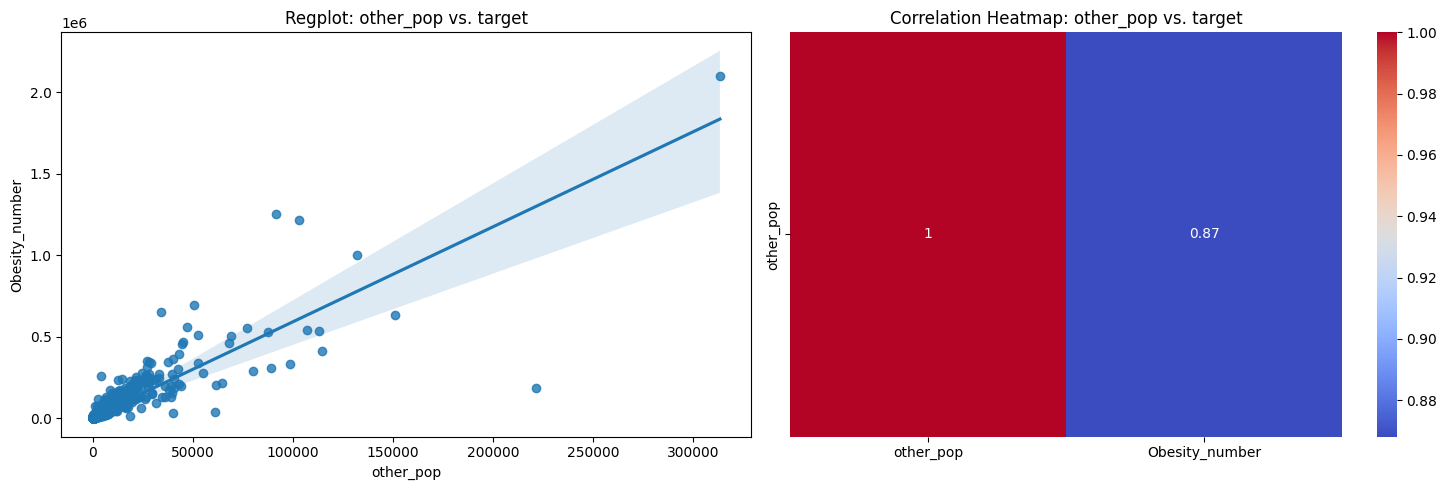

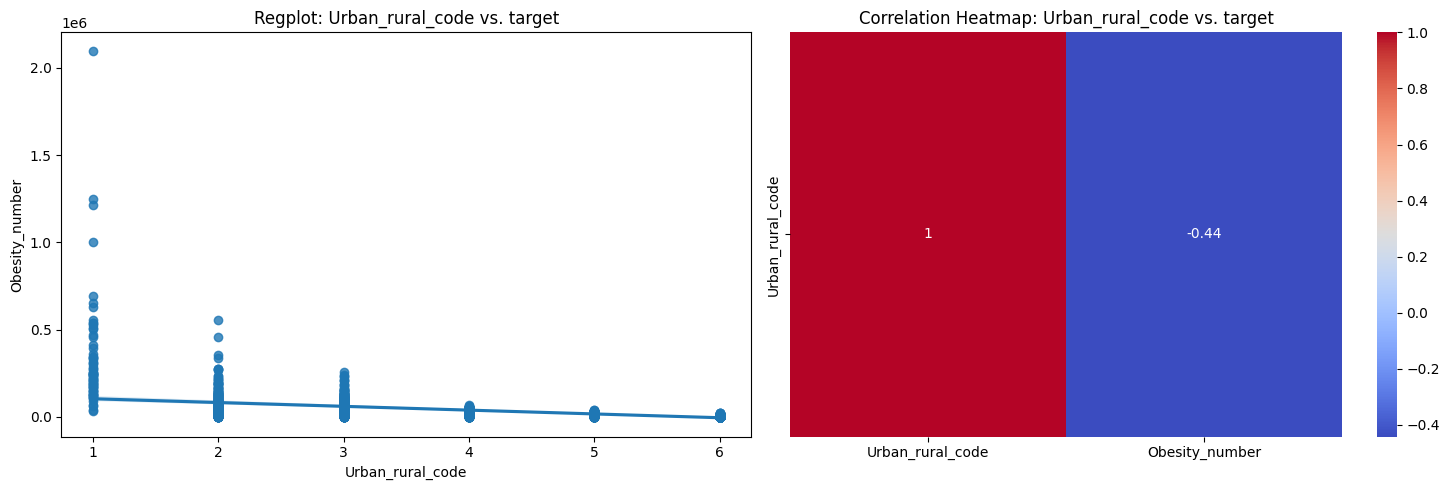

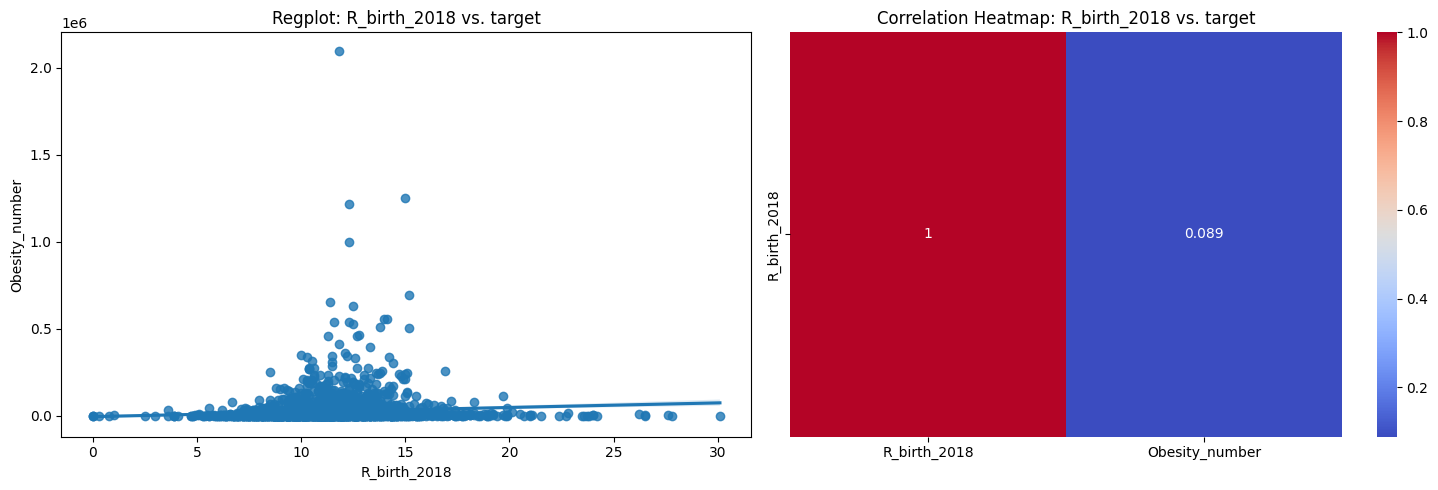

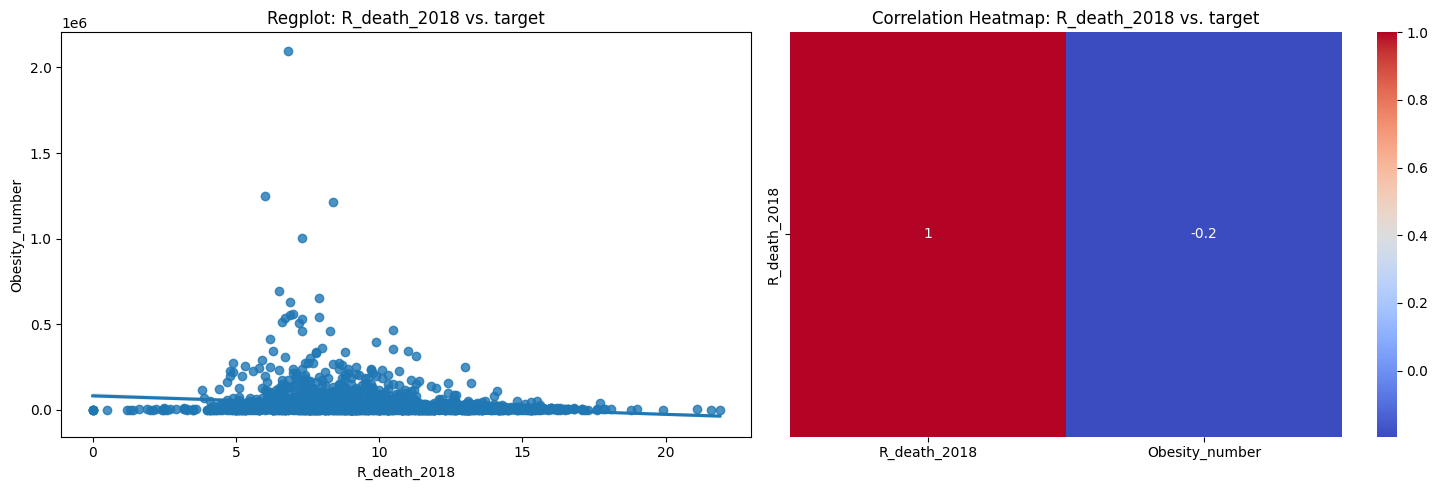

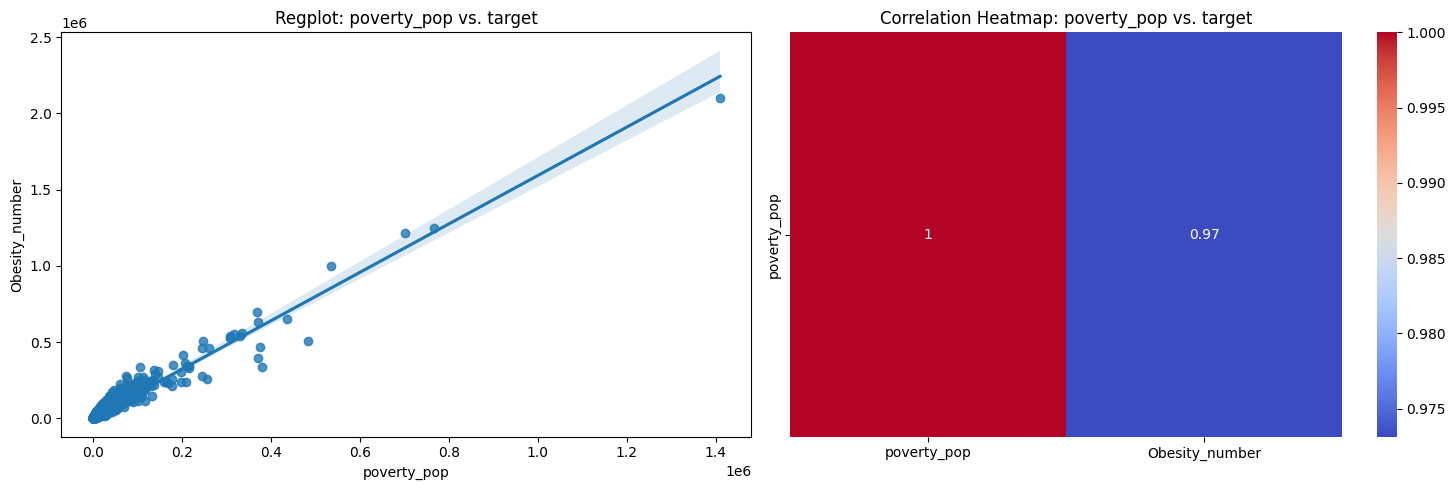

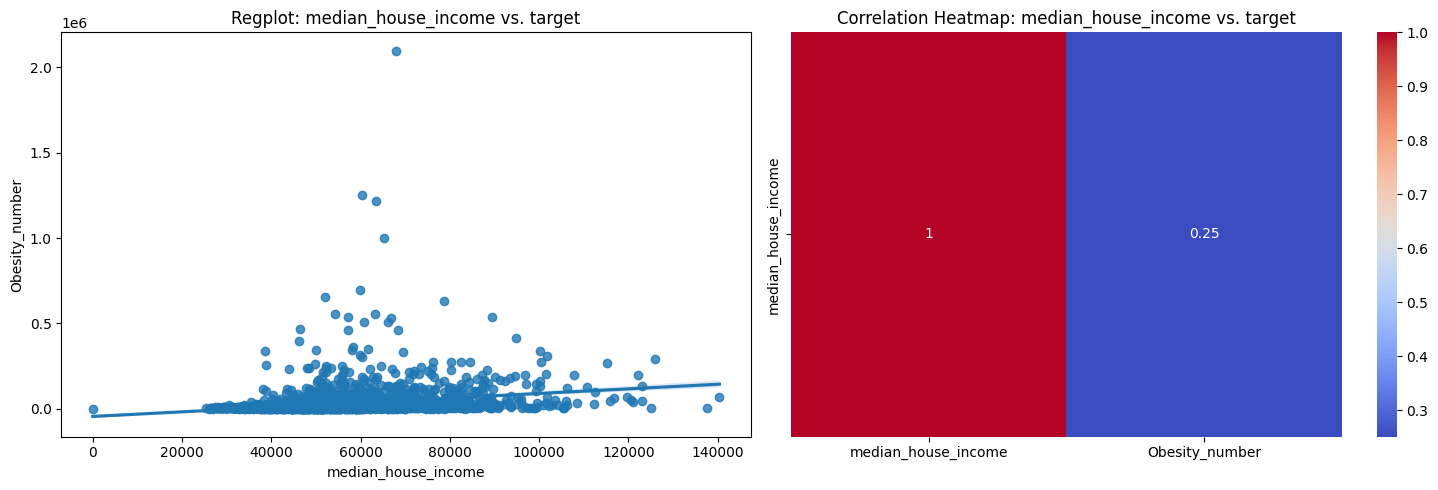

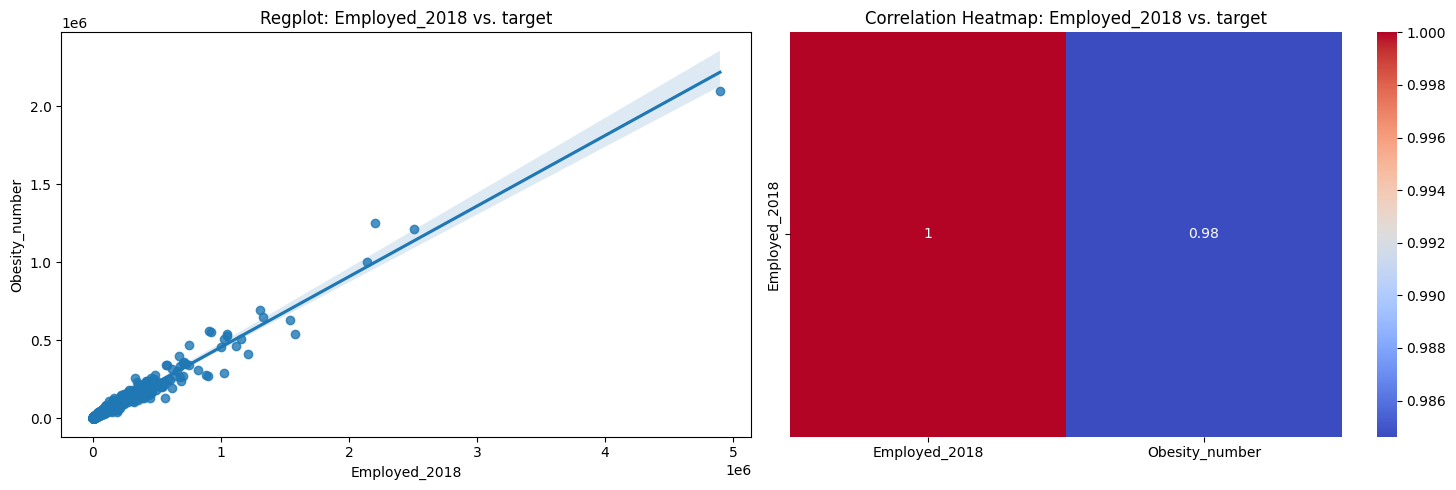

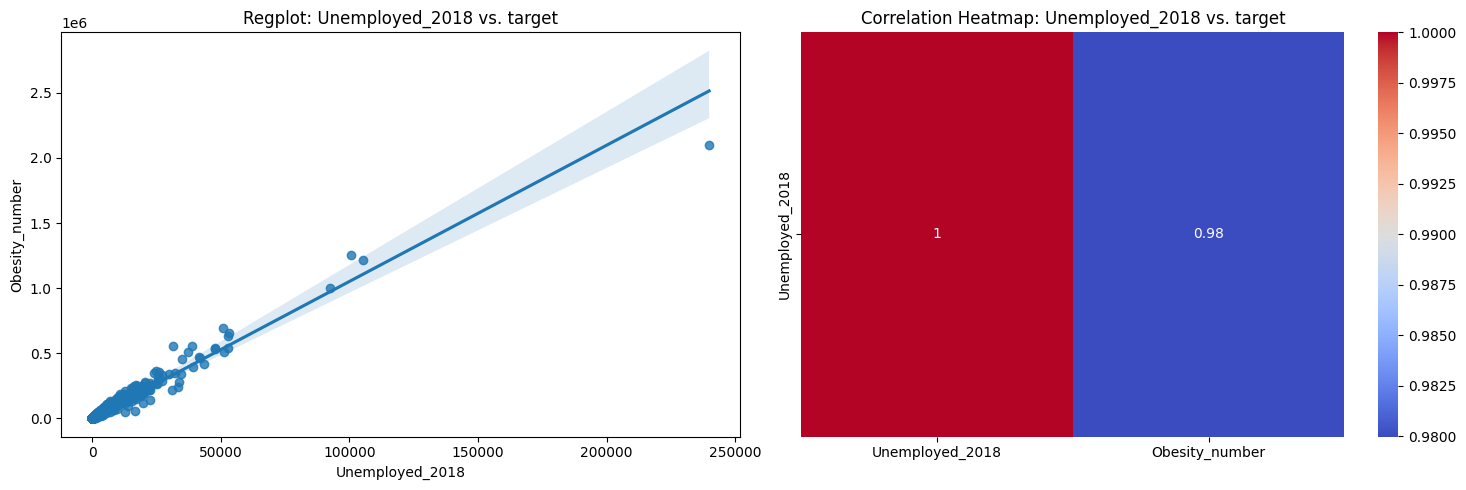

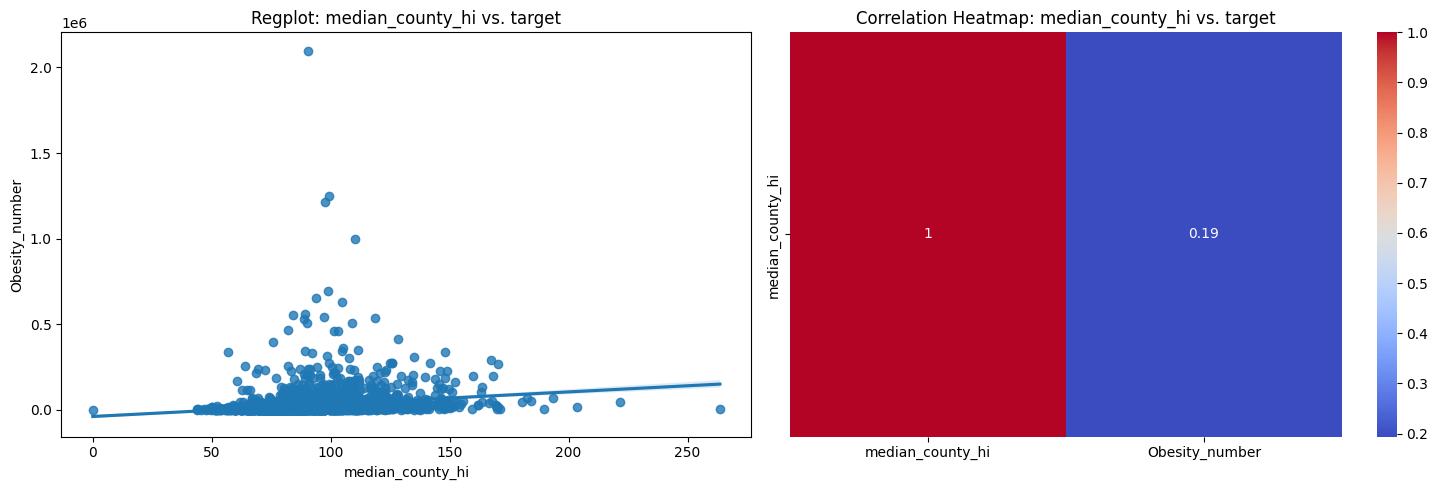

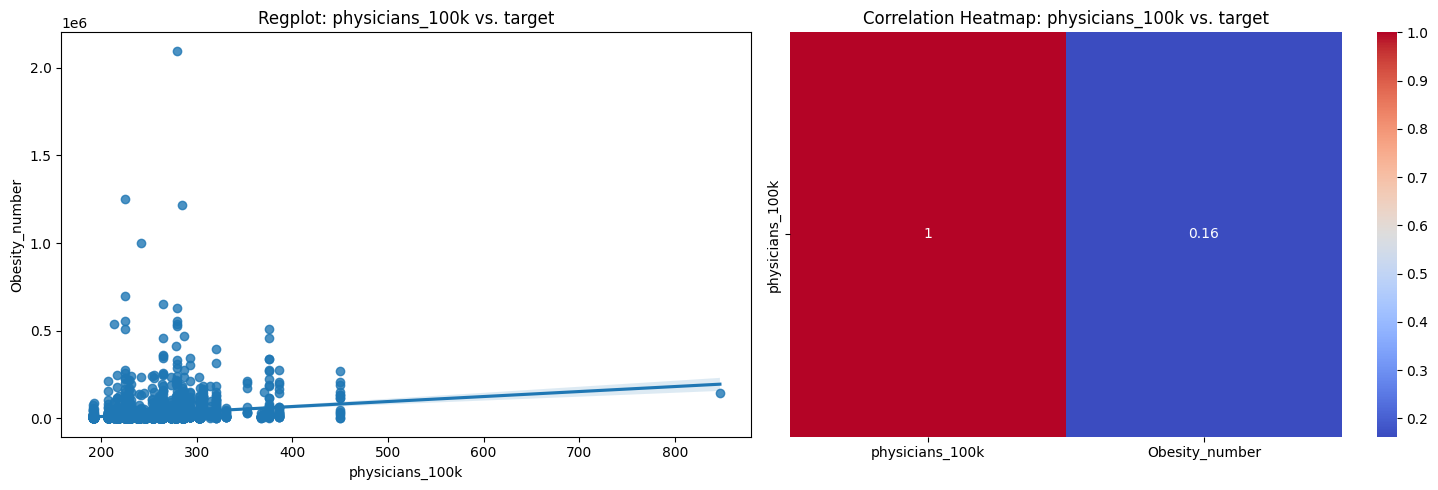

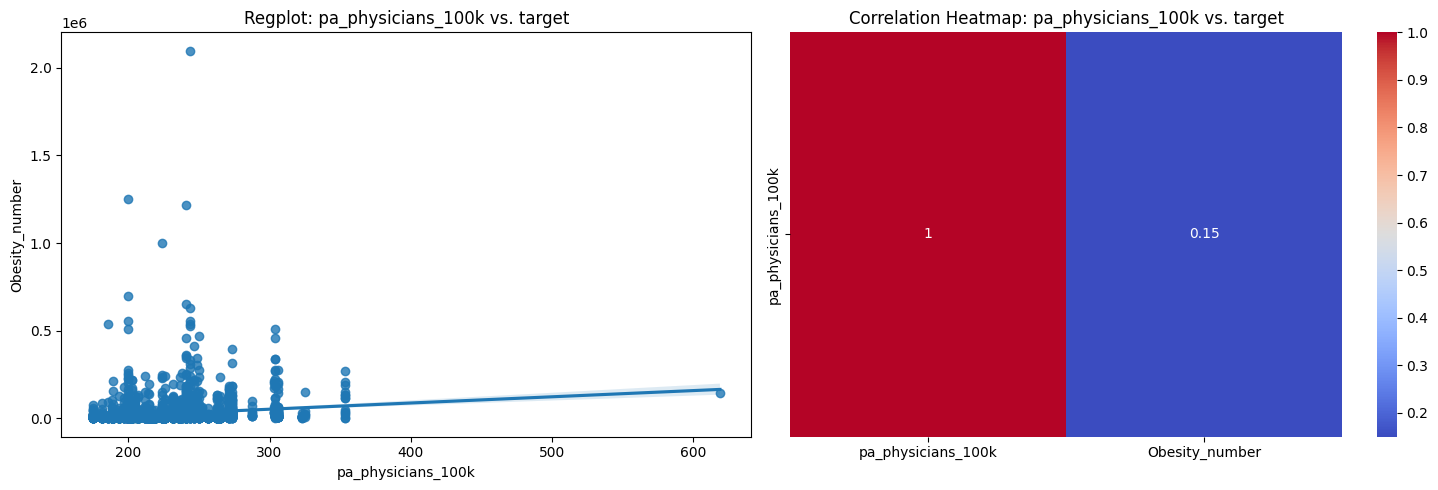

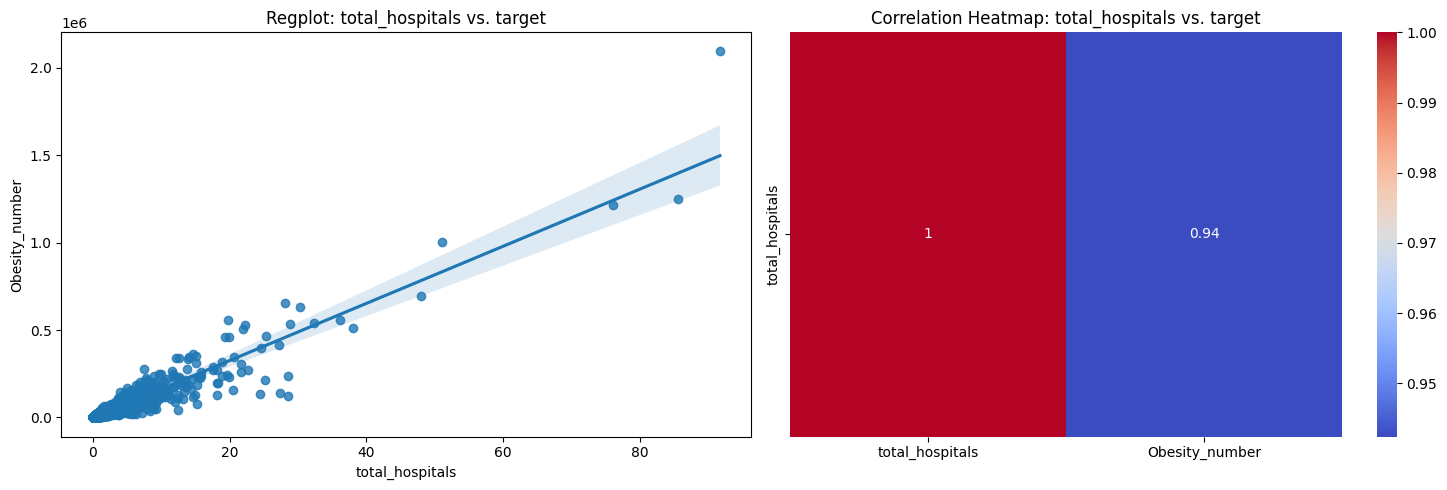

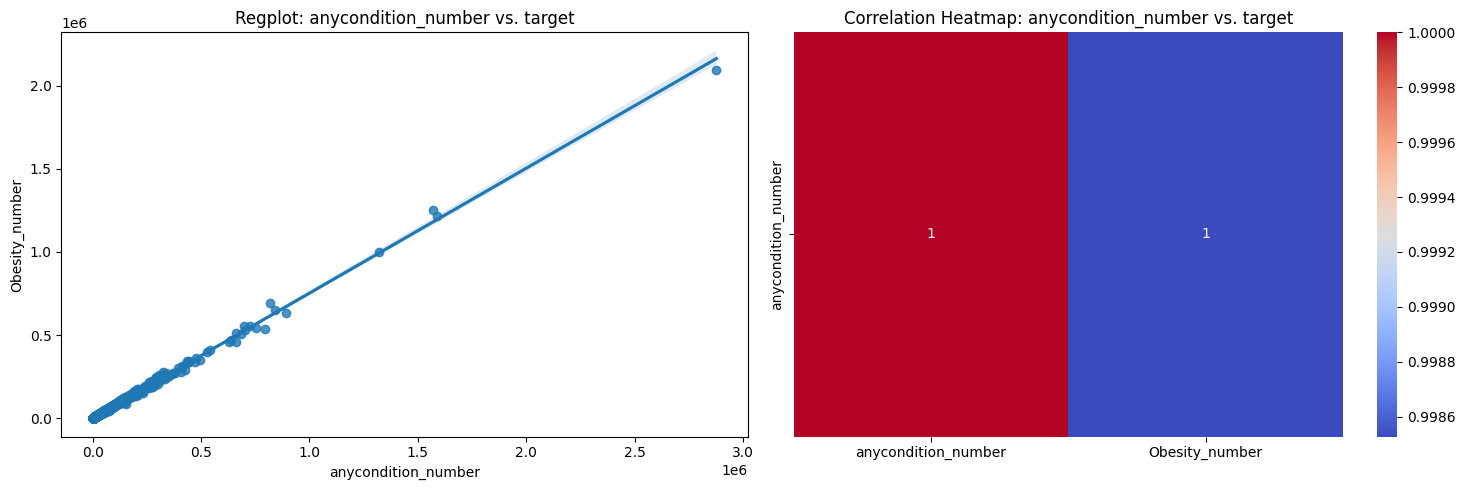

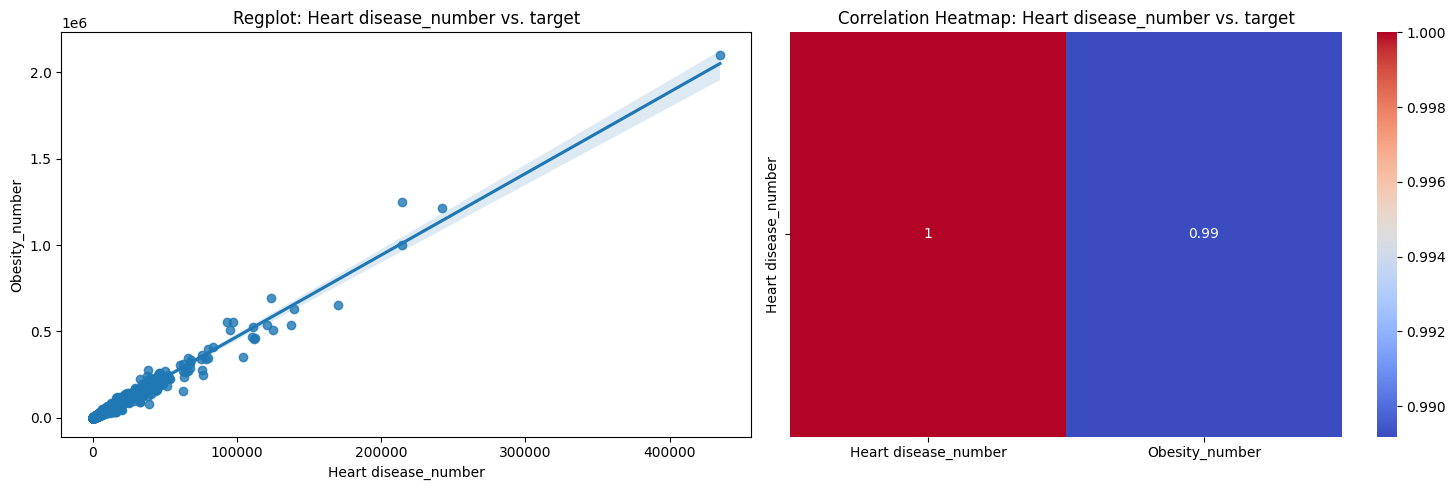

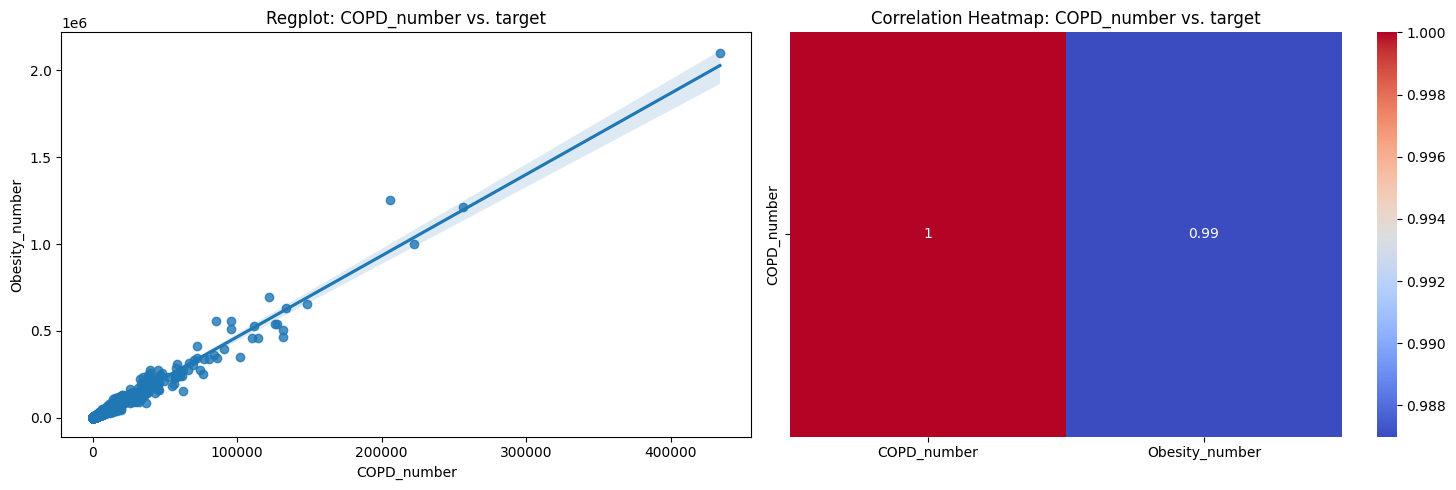

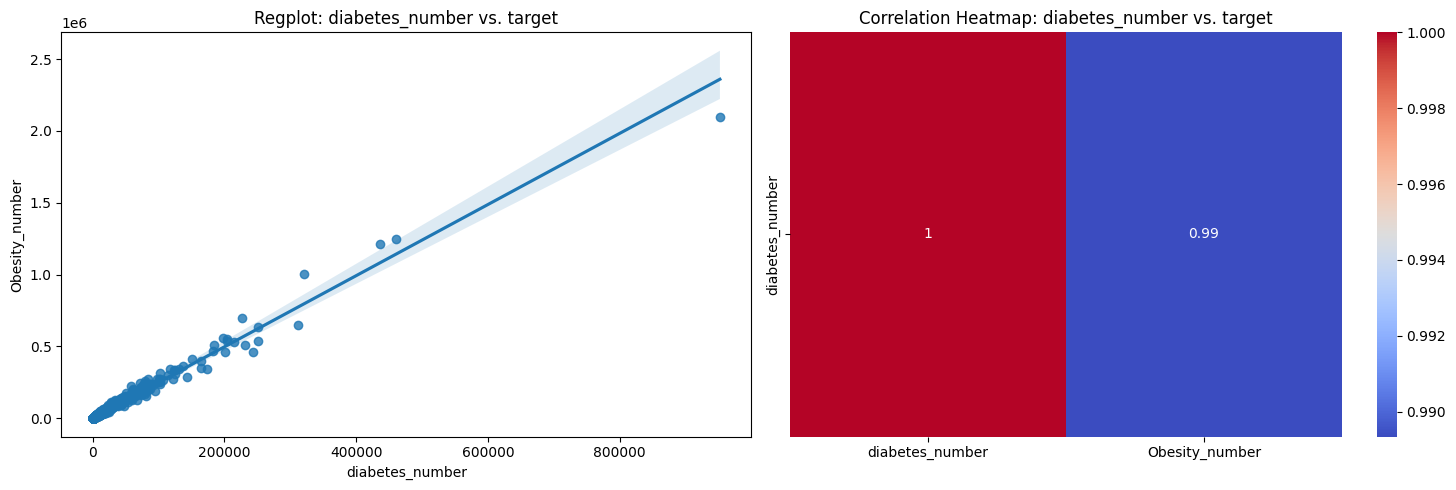

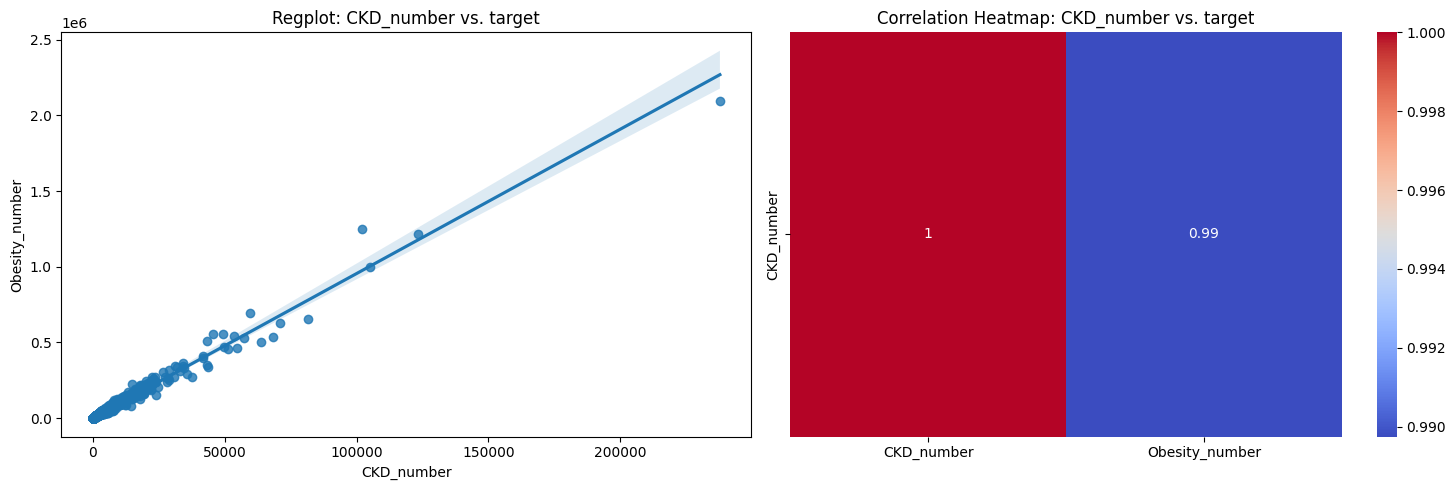

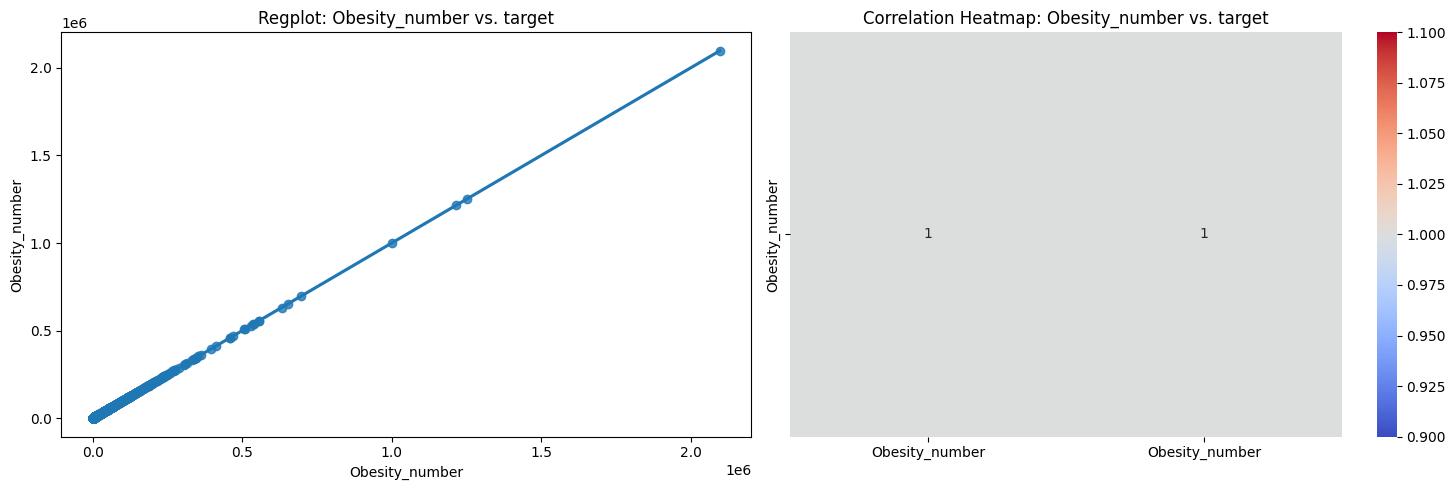

In [59]:
for column in total_data:
    # Setting up the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Regression plot
    sns.regplot(x=column, y=target, data=total_data, ax=axes[0])
    axes[0].set_title(f'Regplot: {column} vs. target')

    # Heatmap of correlation
    sns.heatmap(total_data[[column, target]].corr().iloc[0:1, :], annot=True, cmap='coolwarm', ax=axes[1])
    axes[1].set_title(f'Correlation Heatmap: {column} vs. target')

    # Show the plot for each column
    plt.tight_layout()
    plt.show()

The analysis carried out allowed us to observe the existence of a high correlation of the target with different predictors. From this, it is possible to affirm that there is a linear relationship between the amount of population in a county, the amount of diseases and the total number of obese population, among other variables.

It is important to say that the variable 'anycondition_number' also includes obesity numbers, which results in a correlation of 1. For the purpouse of this analysis, this predictor will be dropped.

In [60]:
total_data = total_data.drop(columns='anycondition_number',axis=1)

3.2. General correlation heatmap


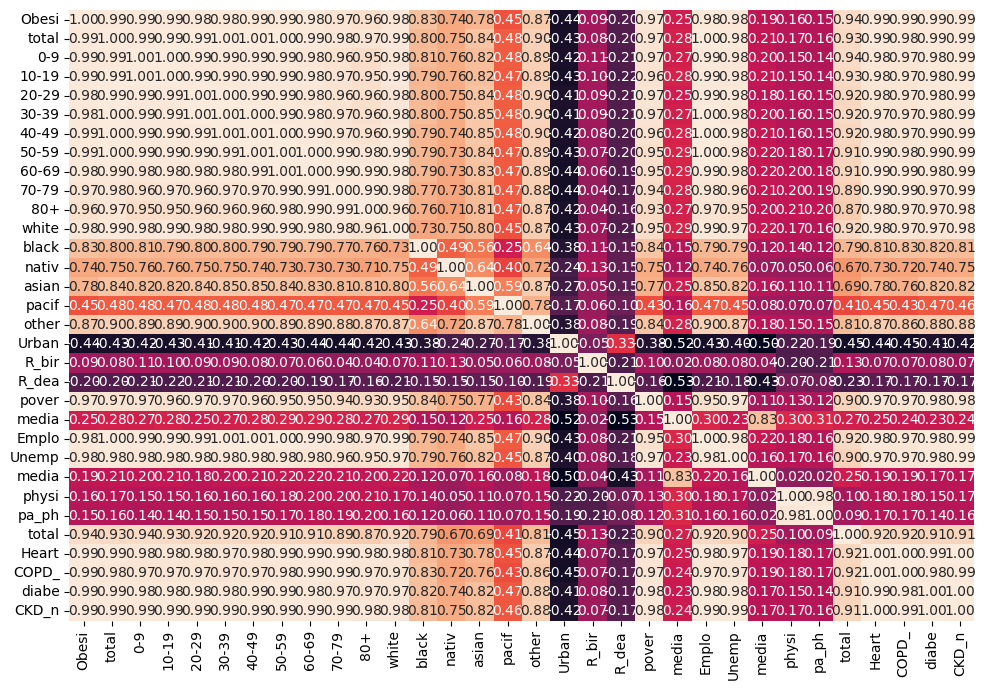

In [61]:
eda.general_large_heatmap(total_data,target)

The heat map clearly shows that the variables **associated with the number of population and health** are the ones that have the best correlation with the target.
Additionally, it is possible to observe that the **correlation between the target and the ethnic groups** is reduced based on the total percentage of the population.
Except from **total hospitals**, the **public health variables have a low correlation with the target**, as well as those related to **average income and the difference between rural and urban**.
Finally, it is important **to state that although poverty, employment and unemployment have a high correlation with the target**, it is possible that this is due to the fact that** these variables also have a high correlation with the total amount of population**.

In [62]:
corr_df = eda.simple_corr(total_data,target)
corr_df.sort_values(by='Score',ascending=False)
    

Variable     Score
1                    0-9  0.991474
2                  10-19  0.990836
0              total_pop  0.990398
30            CKD_number  0.989750
29       diabetes_number  0.989339
27  Heart disease_number  0.989187
28           COPD_number  0.986998
5                  40-49  0.985814
6                  50-59  0.985114
21         Employed_2018  0.984629
3                  20-29  0.983675
7                  60-69  0.983584
4                  30-39  0.983254
10             white_pop  0.980783
22       Unemployed_2018  0.979988
19           poverty_pop  0.973125
8                  70-79  0.970074
9                    80+  0.955014
26       total_hospitals  0.942396
15             other_pop  0.868145
11             black_pop  0.828597
13             asian_pop  0.779690
12            native_pop  0.735329
14           pacific_pop  0.448046
20   median_house_income  0.251590
23      median_county_hi  0.194119
24       physicians_100k  0.162068
25    pa_physicians_100k  0.150007
17          R_birth_2018  0.089129
18          R_death_2018 -0.195138
16      Urban_rural_code -0.441461

### 3.3. Merging variables

Next, an analysis for merging variables will be performed:

In [63]:
total_data.columns

Index(['total_pop', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80+', 'white_pop', 'black_pop', 'native_pop',
       'asian_pop', 'pacific_pop', 'other_pop', 'Urban_rural_code',
       'R_birth_2018', 'R_death_2018', 'poverty_pop', 'median_house_income',
       'Employed_2018', 'Unemployed_2018', 'median_county_hi',
       'physicians_100k', 'pa_physicians_100k', 'total_hospitals',
       'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number',
       'Obesity_number'],
      dtype='object')

- **Population**: it is possible to see that the total population has a high correlation score and there are 8 additional variables with almost the same result. Due to the fact that the sum of the populations gives the same result as 'total_pop', all this varaibles will be dropped.

In [64]:
total_data = total_data.drop(columns=['0-9', '10-19', '20-29', 
                                      '30-39', '40-49', '50-59',
                                      '60-69', '70-79', '80+'], axis=1)

- **Ethnic type**: the same situation happens with ethnic columns. In this case, since some of the ethnics have a low population as % of the total, the correlation score is not as high as total pop. In consecuence, all this variables will also be dropped.

In [65]:
total_data = total_data.drop(columns=['white_pop', 'black_pop', 
                                      'native_pop', 'asian_pop', 
                                      'pacific_pop', 'other_pop'], axis=1)

- **Other diseases**: the other diseases listed in this dataset - heart disease, COPD, diabetes and CKD - also have a strong correlation with the target and are closely linked to the population total. A new variable called 'other_disease_num' is created to reduce the number of variables. This column will have the same value as the maximum number of diseases from the previous column.

In [66]:
total_data['other_diseases_num'] = total_data[['Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number']].max(axis=1)
total_data = total_data.drop(columns=['Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number'], axis=1)
total_data.head(2)

total_pop  Urban_rural_code  R_birth_2018  R_death_2018  poverty_pop  \
0      55601                 3          11.8           9.6         7587   
1     218022                 4          10.5          10.3        21069   

   median_house_income  Employed_2018  Unemployed_2018  median_county_hi  \
0                59338          25015              942             119.0   
1                57588          90456             3393             115.5   

   physicians_100k  pa_physicians_100k  total_hospitals  Obesity_number  \
0            217.1               196.7         1.148905           15193   
1            217.1               196.7         4.505074           50761   

   other_diseases_num  
0                5462  
1               20520

In [67]:
total_data.columns

Index(['total_pop', 'Urban_rural_code', 'R_birth_2018', 'R_death_2018',
       'poverty_pop', 'median_house_income', 'Employed_2018',
       'Unemployed_2018', 'median_county_hi', 'physicians_100k',
       'pa_physicians_100k', 'total_hospitals', 'Obesity_number',
       'other_diseases_num'],
      dtype='object')

After the feature selection, the correlations are the following:

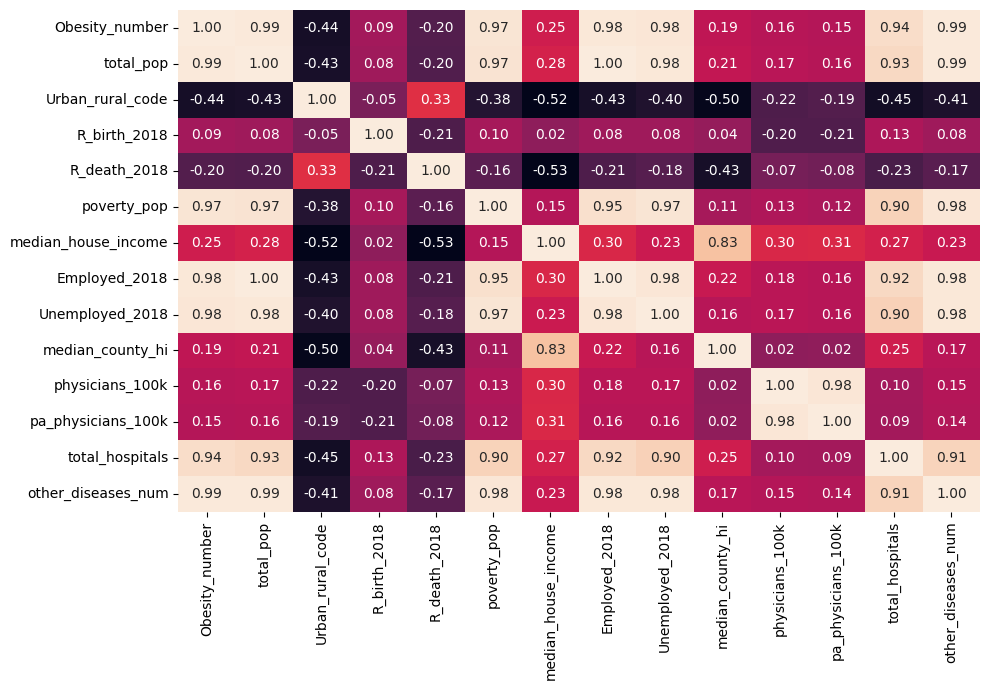

In [68]:
eda.general_heatmap(total_data,target)

### 3.3. Outlier analysis

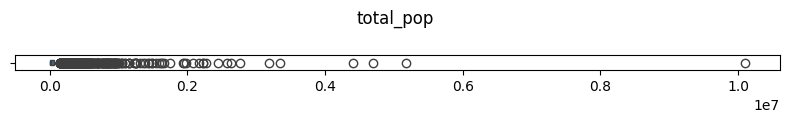

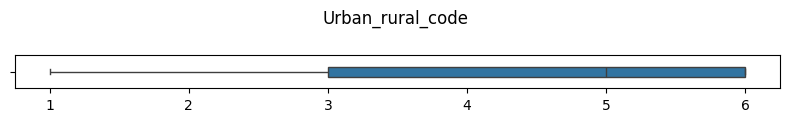

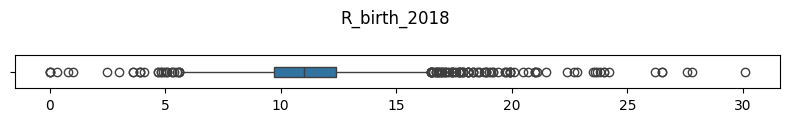

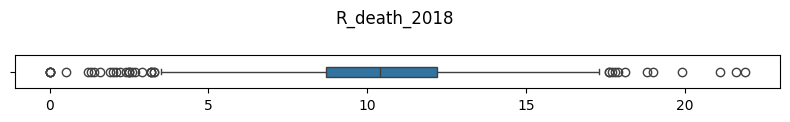

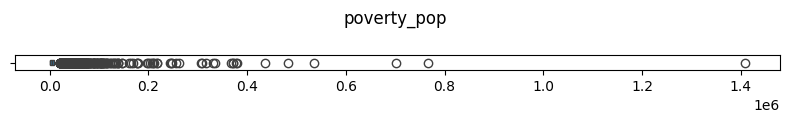

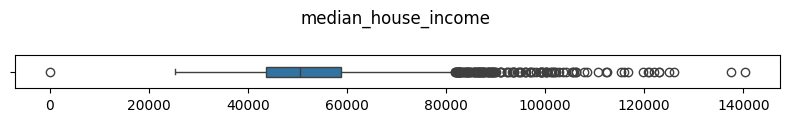

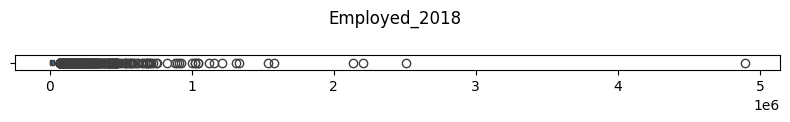

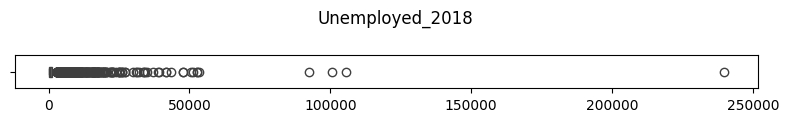

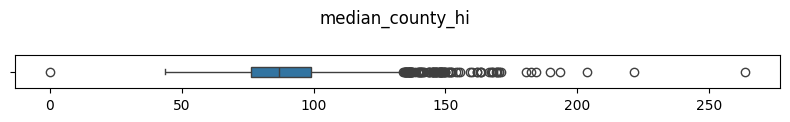

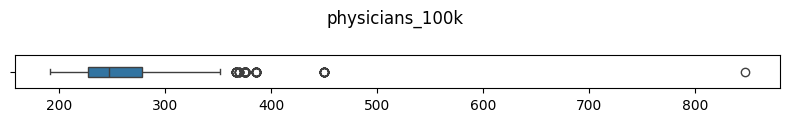

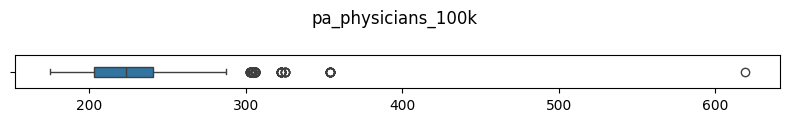

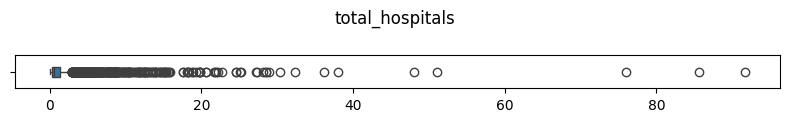

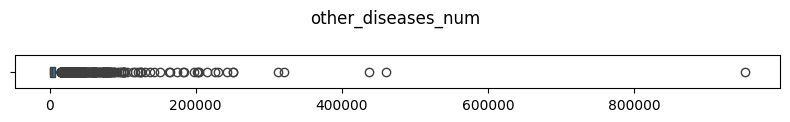

count           mean            std         min  \
total_pop            3140.0  104189.412420  333583.395432   88.000000   
Urban_rural_code     3140.0       4.635350       1.510447    1.000000   
R_birth_2018         3140.0      11.167739       2.522839    0.000000   
R_death_2018         3140.0      10.365287       2.687543    0.000000   
poverty_pop          3140.0   13328.313694   45609.726274    0.000000   
median_house_income  3140.0   52767.083758   13907.992668    0.000000   
Employed_2018        3140.0   49470.478662  161957.005094    0.000000   
Unemployed_2018      3140.0    2005.100318    6971.115396    0.000000   
median_county_hi     3140.0      89.413535      20.144532    0.000000   
physicians_100k      3140.0     254.923567      42.291759  191.300000   
pa_physicians_100k   3140.0     226.159013      31.542980  174.800000   
total_hospitals      3140.0       1.655299       4.293436    0.001363   
Obesity_number       3140.0   25276.131529   74466.835305   25.000000   
other_diseases_num   3140.0    9326.577707   29754.601185   11.000000   

                              25%           50%           75%           max  
total_pop            10963.250000  25800.500000  67913.000000  1.010552e+07  
Urban_rural_code         3.000000      5.000000      6.000000  6.000000e+00  
R_birth_2018             9.700000     11.000000     12.400000  3.010000e+01  
R_death_2018             8.700000     10.400000     12.200000  2.190000e+01  
poverty_pop           1597.000000   3769.500000   9397.250000  1.409155e+06  
median_house_income  43677.000000  50564.500000  58822.250000  1.403820e+05  
Employed_2018         4714.500000  11115.000000  30344.000000  4.896512e+06  
Unemployed_2018        200.750000    483.000000   1276.250000  2.398290e+05  
median_county_hi        76.200000     86.900000     99.200000  2.636000e+02  
physicians_100k        227.600000    247.100000    278.800000  8.470000e+02  
pa_physicians_100k     202.900000    223.500000    240.700000  6.190000e+02  
total_hospitals          0.248797      0.524404      1.311585  9.171264e+01  
Obesity_number        3075.000000   7182.500000  18542.500000  2.097906e+06  
other_diseases_num    1187.750000   2743.000000   6679.250000  9.523350e+05

In [69]:
eda.outlier_analysis(total_data,target)


The outlier analysis shows that there are many columns that can contain statistical outliers. Next, the cases will be analyzed.

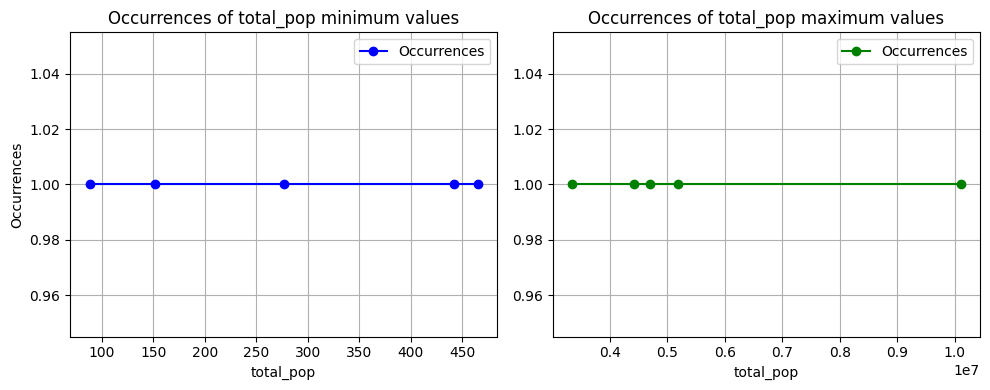

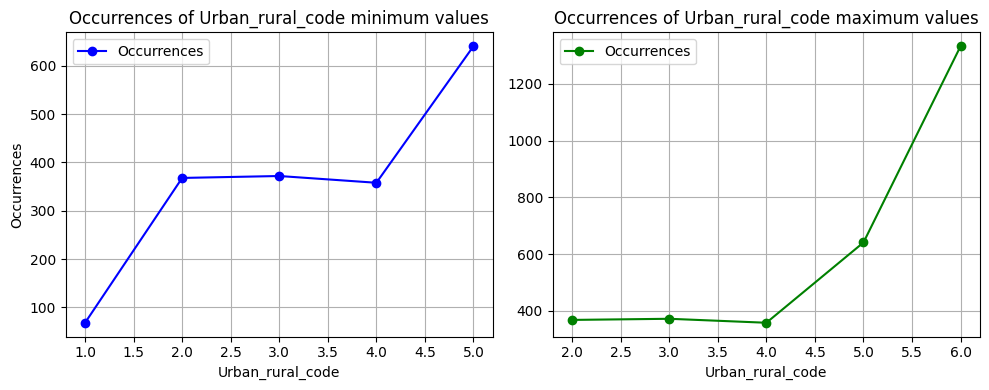

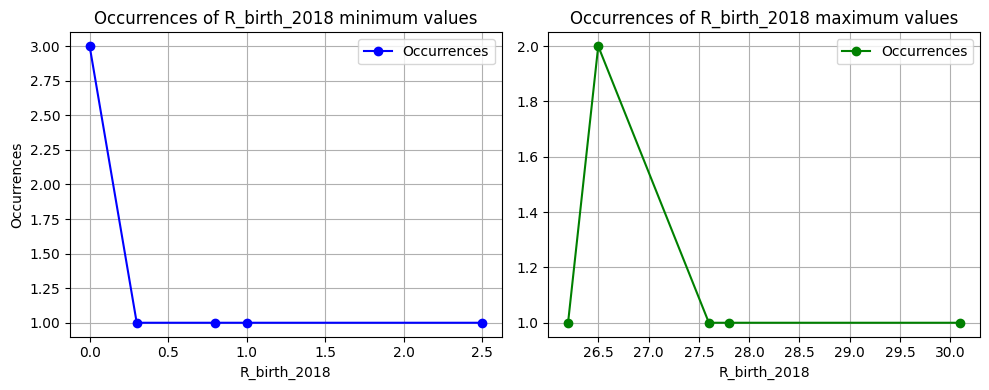

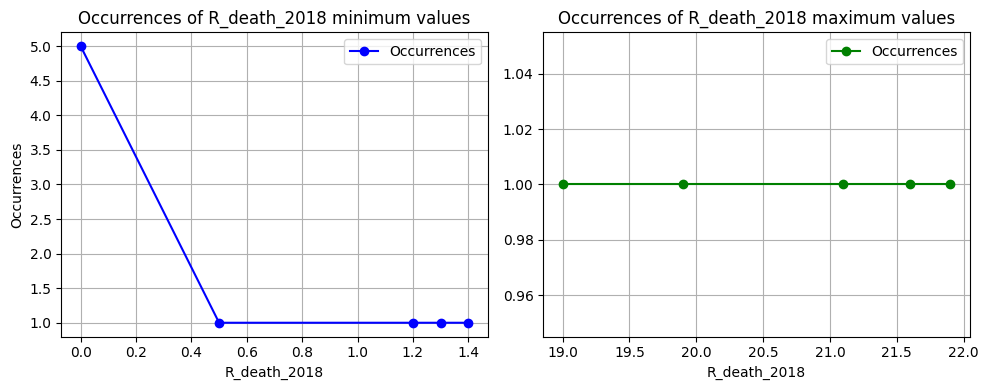

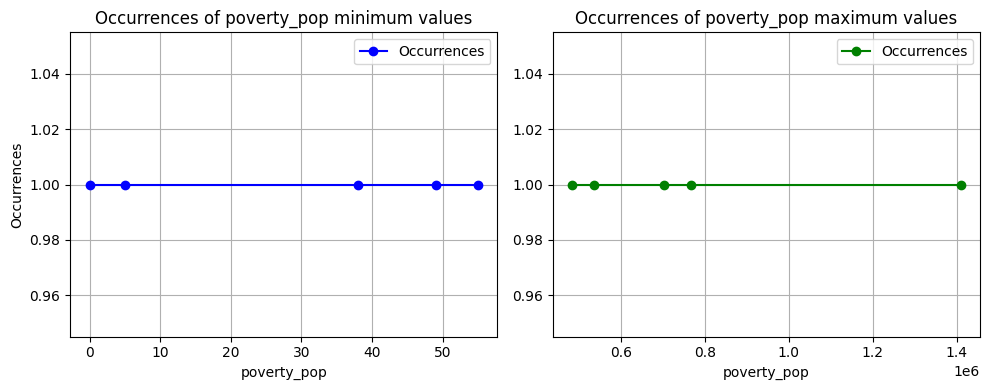

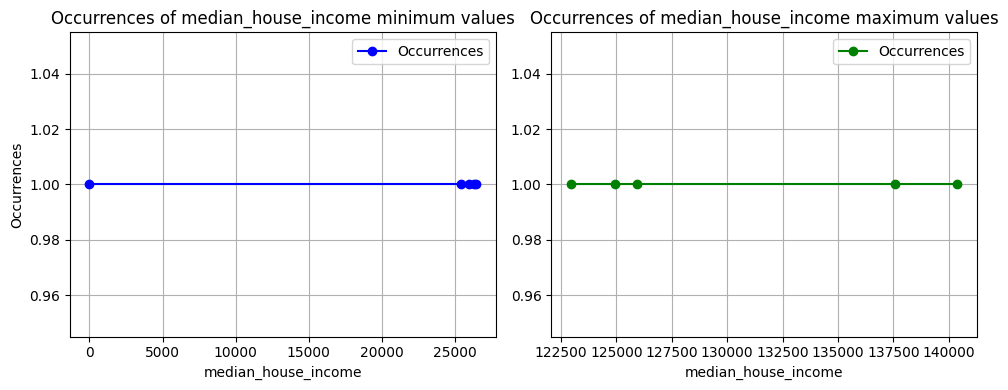

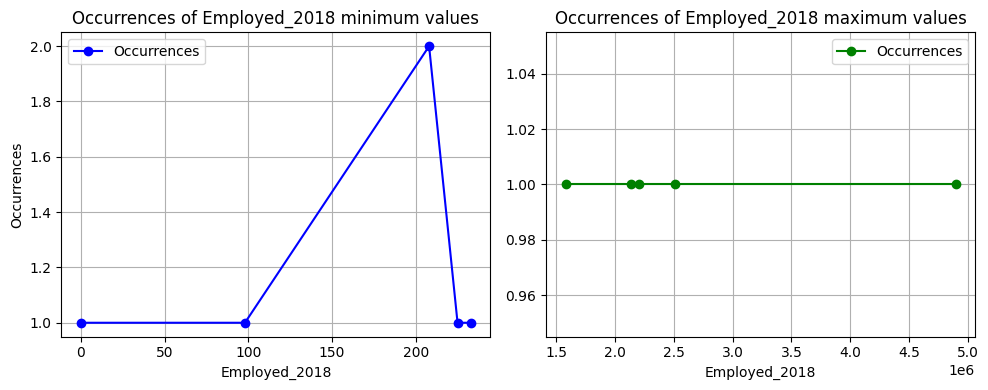

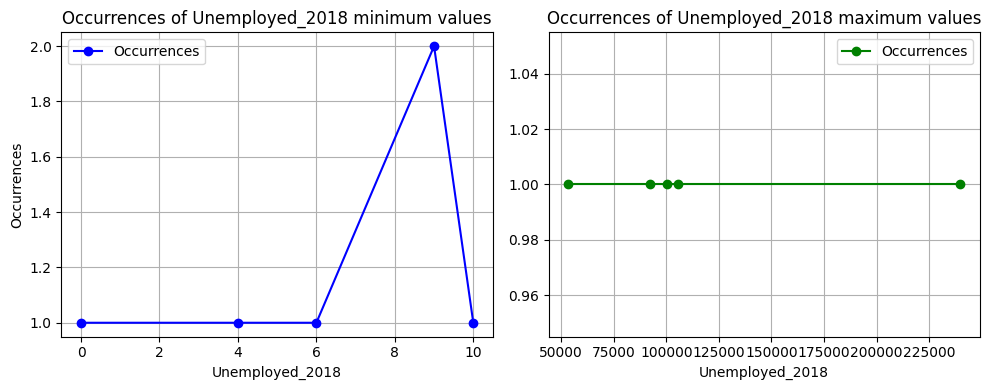

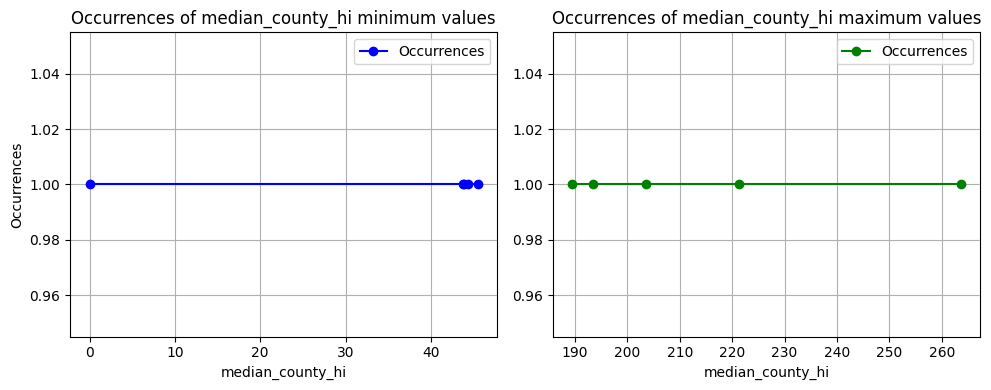

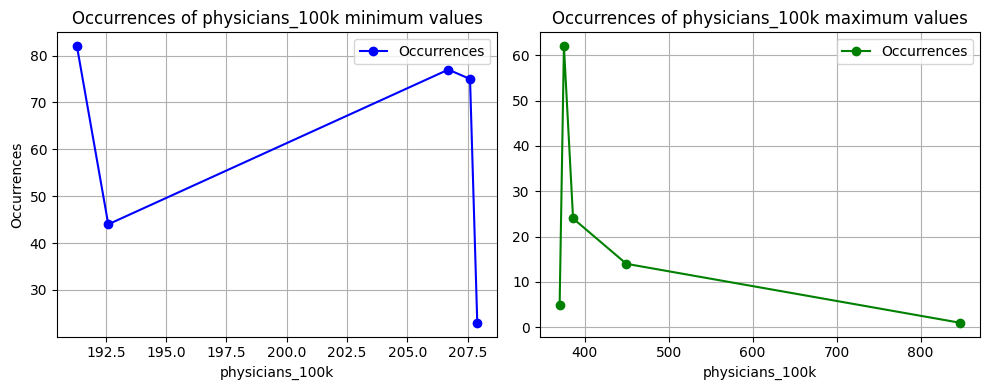

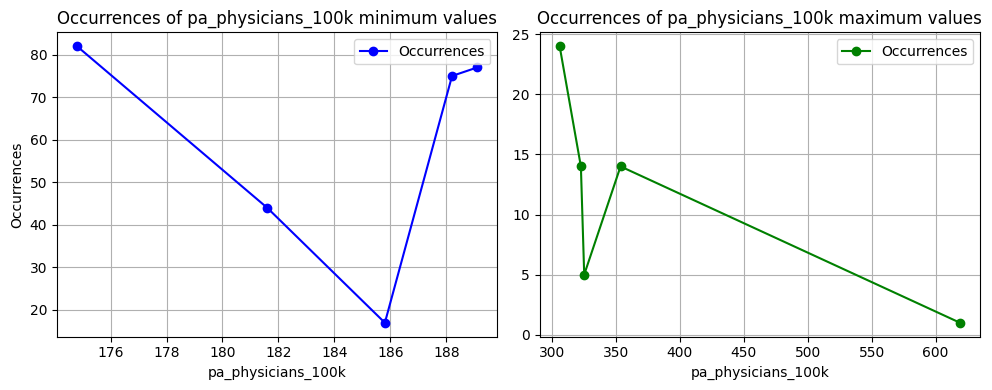

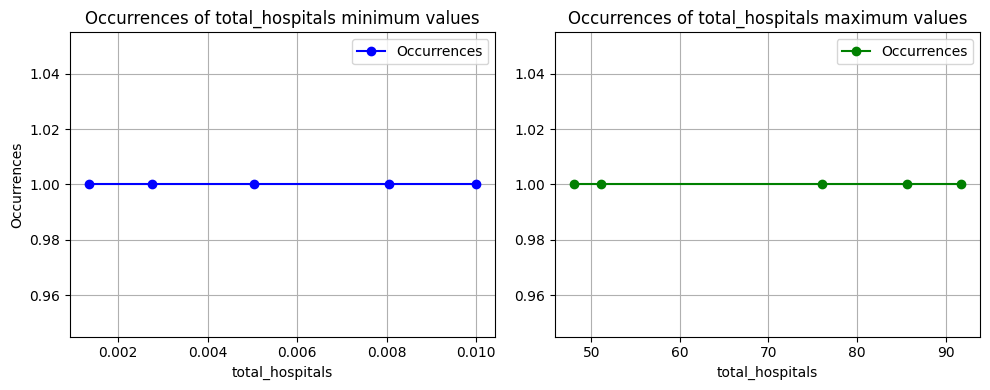

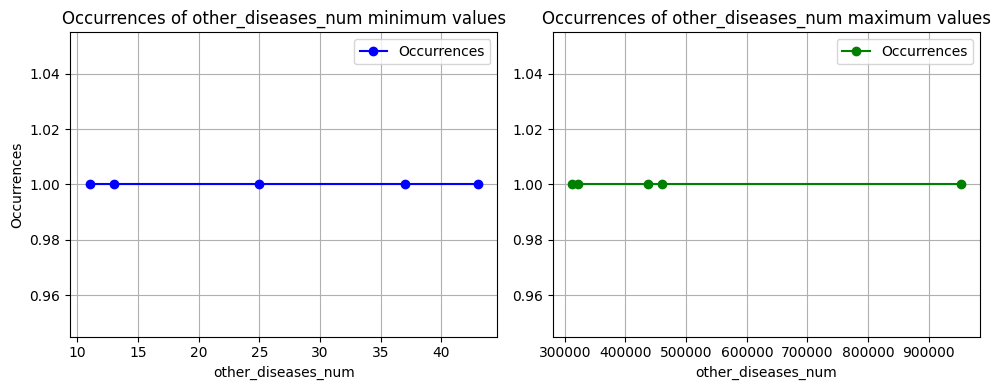

In [70]:
eda.min_max_records(total_data,target,5)

The analysis shows the following results:

- R_birth_2018 has 3 '0' records
- R_death_2019 has 5 '0' records
- median_house_income has 1 '0' record
- employed_2018 has 1 '0' record
- unemployed_2018 has 1 '0' record
- median_county_hi has 1 '0' record

Since the 0 values have no statistical impact in the dataset, they will remain without changes

### 3.4. Train / Test division

In [71]:
from sklearn.model_selection import train_test_split
variables = [x for x in total_data.columns if x != target]
# We divide the dataset into training and test samples
X = total_data.drop(target, axis = 1)[variables]
y = total_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

total_pop  Urban_rural_code  R_birth_2018  R_death_2018  poverty_pop  \
1292      26625                 6          11.3          10.0         4070   
2302      51266                 5           9.7          13.1         7537   
761       37779                 2          10.7           9.2         3978   
2194      91984                 3          10.6           9.1         8855   
1241     134487                 4          12.0          10.3        22602   

      median_house_income  Employed_2018  Unemployed_2018  median_county_hi  \
1292                50374          11696              760              88.9   
2302                45761          21317             1104              75.2   
761                 54718          16245              637              98.2   
2194                61849          43309             1483             119.1   
1241                48413          60219             2646              85.5   

      physicians_100k  pa_physicians_100k  total_hospitals  other_diseases_num  
1292            287.0               249.7         0.383557                2823  
2302            320.5               273.3         0.796587                5416  
761             230.8               212.0         0.745206                3698  
2194            206.7               189.1         2.915995                7913  
1241            287.0               249.7         1.937404               12987

### 3.5. Standard value scalation

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = variables)
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = variables)
X_train_norm.head()


total_pop  Urban_rural_code  R_birth_2018  R_death_2018  poverty_pop  \
1292  -0.229763          0.910528      0.047698     -0.138376    -0.201794   
2302  -0.161280          0.249092     -0.592179      1.034033    -0.131276   
761   -0.198764         -1.735217     -0.192256     -0.440933    -0.203666   
2194  -0.048115         -1.073780     -0.232248     -0.478753    -0.104468   
1241   0.070012         -0.412344      0.327644     -0.024917     0.175146   

      median_house_income  Employed_2018  Unemployed_2018  median_county_hi  \
1292            -0.173289      -0.230974        -0.177629         -0.032380   
2302            -0.504065      -0.175891        -0.132117         -0.710993   
761              0.138198      -0.204930        -0.193902          0.428284   
2194             0.649528      -0.049982        -0.081974          1.463539   
1241            -0.313903       0.046831         0.071894         -0.200795   

      physicians_100k  pa_physicians_100k  total_hospitals  other_diseases_num  
1292         0.745911            0.735968        -0.295176           -0.215940  
2302         1.530197            1.478643        -0.204487           -0.135257  
761         -0.569817           -0.450424        -0.215769           -0.188714  
2194        -1.134035           -1.171071         0.260870           -0.057561  
1241         0.745911            0.735968         0.046001            0.100319

### 3.6. Feature selection

In [75]:
from sklearn.feature_selection import f_classif, SelectKBest
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test.columns.values[ix])
X_train_sel.head()


total_pop  poverty_pop  Employed_2018  Unemployed_2018  other_diseases_num
0  -0.229763    -0.201794      -0.230974        -0.177629           -0.215940
1  -0.161280    -0.131276      -0.175891        -0.132117           -0.135257
2  -0.198764    -0.203666      -0.204930        -0.193902           -0.188714
3  -0.048115    -0.104468      -0.049982        -0.081974           -0.057561
4   0.070012     0.175146       0.046831         0.071894            0.100319

### 3.7. CSV creation

In [76]:
X_train_sel[target] = list(y_train)
X_test_sel[target] = list(y_test)
X_train_sel.to_csv(r"C:\Users\Francesc\Documents\GitHub\Regularized-linear-regression\data\processed\clean_dataset_train.csv", index=False)
X_test_sel.to_csv(r"C:\Users\Francesc\Documents\GitHub\Regularized-linear-regression\data\processed\clean_dataset_test.csv", index=False)


---

# CONCLUSIONS



1. Names were changed in order to simplify the EDA analysis scrpit

2. The heat map showed that the variables **associated with the health and number and the ethnich of population** are the ones with the high correlation. On the other side,**public health variables have a low correlation with the target**, as well as those related to **average income and the difference between rural and urban**. Finally, it is important **to state that although poverty, employment and unemployment have a high correlation with the target**, it is possible that this is due to the fact that **these variables also have a high correlation with the total amount of population**.

2. Extra columns were merged and dropped, resulting in a resulting total of 14 columns.

3. Outlier analysis provided that 12 inputs had a 0 value that can be considered real outlier and not only statistic. Due to the low amount, the outliers will remain without any type of change. 

4. The top 5 feature selection have as result the following columns: 'total_pop', 'poverty_pop', 'Employed_2018', 'Unemployed_2018', 'other_diseases_num'